# Case Itaú Unibanco - Estágio em Crédito PF Dados

No ano de 2000, no coração do mundo mágico, o Gringotts, o tradicional banco dos bruxos,
se especializou no financiamento de itens mágicos. Com o passar dos anos, o Gringotts se
tornou líder de mercado, oferecendo financiamento de varinhas e vassouras mágicas para
bruxos e bruxas de todas as casas e origens (mesmo para aqueles que são nascidos
“trouxas”). As políticas expansionistas do Ministério da Magia permitiram a ascensão social
de muitos bruxos, o que, alinhado com a estratégia de crédito do Gringotts, impulsionou o
crescimento dos negócios do banco.
Entretanto, no último ano, o governo bruxo foi atingido por uma grave crise financeira:

• O desemprego entre os bruxos chegou a alarmantes 12%;

• 60% das famílias mágicas enfrentaram dificuldades para honrar suas dívidas;

• O endividamento do Ministério da Magia atingiu 70% do PIB (Produto Interno Bruxo).

• A inadimplência no financiamento de itens mágicos está nos maiores patamares.

Esse cenário levou o Gringotts a repensar sua estratégia de concessão de crédito.

Considerando o cenário descrito acima e o arquivo disponibilizado com dados do histórico
de financiamento do banco, pedimos análises que nos ajudem a definir a melhor estratégia
de crédito para o banco Gringotts.

# Importando as principais bibliotecas para realizar o projeto

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Para esse Case irei utilizar a bilioteca "sqlite3", assim irei integrar o SQL ao python, o que facilita para desenvolver o raciocínio de códigos e gráficos.

In [ ]:
import sqlite3

# EDA (Análise Exploratória de Dados)

## Análises dos Dados

In [ ]:
df = pd.read_csv('Base_dados.csv', encoding='latin-1', sep=';')
df

Número do Contrato  Ano do Contrato Casa do Bruxo Histórico de Crédito  \
0                       1             1981    Grifinoria      04) Médio Risco   
1                       4             1981    Grifinoria      04) Médio Risco   
2                      14             1981    Grifinoria    01) Sem Histórico   
3                      27             1981      Corvinal       03) Alto Risco   
4                      33             1981    Grifinoria      05) Baixo Risco   
...                   ...              ...           ...                  ...   
64882               64463             2000      Corvinal    01) Sem Histórico   
64883               64639             2000     Lufa Lufa      04) Médio Risco   
64884               64677             2000    Grifinoria      05) Baixo Risco   
64885               64732             2000     Lufa Lufa       03) Alto Risco   
64886               64770             2000     Lufa Lufa      05) Baixo Risco   

                Patrimônio do Cliente Ocupação do Bruxo     Risco do bruxo  \
0             Sem Bens Significativos  Bruxos Regulares      04) Cauteloso   
1      Colecionador Artefatos Mágicos  Bruxos Regulares        03) Crítico   
2             Sem Bens Significativos  Bruxos Regulares      04) Cauteloso   
3             Sem Bens Significativos  Bruxos Regulares        03) Crítico   
4      Colecionador Artefatos Mágicos  Bruxos Regulares      04) Cauteloso   
...                               ...               ...                ...   
64882  Colecionador Artefatos Mágicos  Bruxos Regulares        03) Crítico   
64883         Sem Bens Significativos  Bruxos Regulares        03) Crítico   
64884         Sem Bens Significativos  Bruxos Regulares      04) Cauteloso   
64885         Sem Bens Significativos  Bruxos Regulares  02) Muito Crítico   
64886         Sem Bens Significativos  Bruxos Regulares         05) Seguro   

      Poder Aquisitivo do Bruxo Origem da Venda Local da Venda  \
0                     Nuqueiros        Gringots  Beco Diagonal   
1                   Galeonários        Gringots  Beco Diagonal   
2        Mofadores de Monstrons        Gringots  Beco Diagonal   
3                     Nuqueiros        Gringots  Beco Diagonal   
4        Mofadores de Monstrons        Gringots  Beco Diagonal   
...                         ...             ...            ...   
64882               Galeonários      Ambulantes      Hogsmeade   
64883    Mofadores de Monstrons      Ambulantes      Hogsmeade   
64884    Mofadores de Monstrons      Ambulantes      Hogsmeade   
64885                 Nuqueiros      Ambulantes      Hogsmeade   
64886             Aristomágicos      Ambulantes  Beco Diagonal   

      Tipo de Produto  Idade do Bruxo Valor da Renda do Bruxo  \
0             Varinha              83                $26.271    
1           Vassouras              45               $113.550    
2             Varinha              51                $14.607    
3             Varinha              63                $33.941    
4             Varinha              72                $18.034    
...               ...             ...                     ...   
64882         Varinha              65                $78.713    
64883         Varinha              48                 $9.896    
64884         Varinha              54                $12.431    
64885         Varinha              59                $19.323    
64886         Varinha              85                $69.046    

      Valor da Parcela Contratado Valor do Financiamento  \
0                        $16.175               $251.124    
1                        $19.882               $749.925    
2                         $4.041               $300.000    
3                         $1.467                $92.250    
4                        $10.843               $396.930    
...                           ...                    ...   
64882                    $12.651               $381.713    
64883                    $13.162           

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Número do Contrato                 64887 non-null  int64 
 1   Ano do Contrato                    64887 non-null  int64 
 2   Casa do Bruxo                      64887 non-null  object
 3   Histórico de Crédito               64887 non-null  object
 4   Patrimônio do Cliente              64887 non-null  object
 5   Ocupação do Bruxo                  64887 non-null  object
 6   Risco do bruxo                     64887 non-null  object
 7   Poder Aquisitivo do Bruxo          64887 non-null  object
 8   Origem da Venda                    64887 non-null  object
 9   Local da Venda                     64887 non-null  object
 10  Tipo de Produto                    64887 non-null  object
 11  Idade do Bruxo                     64887 non-null  int64 
 12  Valo

Aqui é possível notar que ao importar a base de dados as colunas de valores numéricos (renda, Financiamento e Parcela) se tornaram em STRING.

As três células de código a seguir corrigem esse pequeno problema:

In [ ]:
df['Valor da Renda do Bruxo'] = (
    df['Valor da Renda do Bruxo']

    .str.replace('$', '', regex=False)

    .str.replace('.', '', regex=False)

    .astype(float)
)

print(df[['Valor da Renda do Bruxo']].head())
print(f"Novo tipo de dado da coluna: {df['Valor da Renda do Bruxo'].dtype}")

   Valor da Renda do Bruxo
0                  26271.0
1                 113550.0
2                  14607.0
3                  33941.0
4                  18034.0
Novo tipo de dado da coluna: float64


In [ ]:
df['Valor da Parcela Contratado'] = (
    df['Valor da Parcela Contratado']

    .str.replace('$', '', regex=False)

    .str.replace('.', '', regex=False)

    .astype(float)
)

print(df[['Valor da Parcela Contratado']].head())
print(f"Novo tipo de dado da coluna: {df['Valor da Parcela Contratado'].dtype}")

   Valor da Parcela Contratado
0                      16175.0
1                      19882.0
2                       4041.0
3                       1467.0
4                      10843.0
Novo tipo de dado da coluna: float64


In [ ]:
df['Valor do Financiamento'] = (
    df['Valor do Financiamento']

    .str.replace('$', '', regex=False)

    .str.replace('.', '', regex=False)

    .astype(float)
)

print(df[['Valor do Financiamento']].head())
print(f"Novo tipo de dado da coluna: {df['Valor do Financiamento'].dtype}")

   Valor do Financiamento
0                251124.0
1                749925.0
2                300000.0
3                 92250.0
4                396930.0
Novo tipo de dado da coluna: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Número do Contrato                 64887 non-null  int64  
 1   Ano do Contrato                    64887 non-null  int64  
 2   Casa do Bruxo                      64887 non-null  object 
 3   Histórico de Crédito               64887 non-null  object 
 4   Patrimônio do Cliente              64887 non-null  object 
 5   Ocupação do Bruxo                  64887 non-null  object 
 6   Risco do bruxo                     64887 non-null  object 
 7   Poder Aquisitivo do Bruxo          64887 non-null  object 
 8   Origem da Venda                    64887 non-null  object 
 9   Local da Venda                     64887 non-null  object 
 10  Tipo de Produto                    64887 non-null  object 
 11  Idade do Bruxo                     64887 non-null  int

**PRONTO!**

In [ ]:
df.head()

Número do Contrato  Ano do Contrato Casa do Bruxo Histórico de Crédito  \
0                   1             1981    Grifinoria      04) Médio Risco   
1                   4             1981    Grifinoria      04) Médio Risco   
2                  14             1981    Grifinoria    01) Sem Histórico   
3                  27             1981      Corvinal       03) Alto Risco   
4                  33             1981    Grifinoria      05) Baixo Risco   

            Patrimônio do Cliente Ocupação do Bruxo Risco do bruxo  \
0         Sem Bens Significativos  Bruxos Regulares  04) Cauteloso   
1  Colecionador Artefatos Mágicos  Bruxos Regulares    03) Crítico   
2         Sem Bens Significativos  Bruxos Regulares  04) Cauteloso   
3         Sem Bens Significativos  Bruxos Regulares    03) Crítico   
4  Colecionador Artefatos Mágicos  Bruxos Regulares  04) Cauteloso   

  Poder Aquisitivo do Bruxo Origem da Venda Local da Venda Tipo de Produto  \
0                 Nuqueiros        Gringots  Beco Diagonal         Varinha   
1               Galeonários        Gringots  Beco Diagonal       Vassouras   
2    Mofadores de Monstrons        Gringots  Beco Diagonal         Varinha   
3                 Nuqueiros        Gringots  Beco Diagonal         Varinha   
4    Mofadores de Monstrons        Gringots  Beco Diagonal         Varinha   

   Idade do Bruxo  Valor da Renda do Bruxo  Valor da Parcela Contratado  \
0              83                  26271.0                      16175.0   
1              45                 113550.0                      19882.0   
2              51                  14607.0                       4041.0   
3              63                  33941.0                       1467.0   
4              72                  18034.0                      10843.0   

   Valor do Financiamento  Marcação de Cliente Inadimplentes  \
0                251124.0                                  0   
1                749925.0                                  0   
2                300000.0                                  0   
3                 92250.0                                  0   
4                396930.0                                  0   

   Quantidade de Contratos  
0                        1  
1                        1  
2                        1  
3                        1  
4                        1

A célula de código abaixo está conectando nossa base de dados ao SQL.

In [ ]:
conn = sqlite3.connect('my_database.db')

df.to_sql('table_case', conn, if_exists='replace', index=False)

print(f"DataFrame salvo como tabela 'table_case' no banco de dados 'my_database.db' com sucesso!")

DataFrame salvo como tabela 'table_case' no banco de dados 'my_database.db' com sucesso!


1ª Query, aqui estou vendo qual a proporção entre clientes Adimplentes e Inadimplentes em todo o histórico da base.

Aqui podemos ver que proporcionalmente existem pouquíssimos clientes inadimplentes (cerca de 6,9%).

In [ ]:
sql_query = """
SELECT
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  count("Marcação de Cliente Inadimplentes") as Contagem
FROM table_case
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Contagem
0         0     60382
1         1      4505

In [ ]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Contagem',
    title='Distribuição de Clientes por Status de Inadimplência, em Todo o Histórico da Base de Dados',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Contagem': 'Contagem de Clientes'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

2ª Query, aqui estou vendo qual a proporção entre Valor Financiado de Adimplentes e Inadimplentes em todo o histórico da base.

Ao olharmos esse gráfico, é notável que a proporção de valor inadimplente é bem menor em relação ao adimplente, PORÉM, são no total 2 BILHÕES em galeões, o que é um valor MUITO grande se formos levar para a realidade.

In [ ]:
sql_query = """
Select
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  sum("Valor do Financiamento") as Valor_Financiamento_Total
FROM table_case
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Valor_Financiamento_Total
0         0               3.154537e+10
1         1               2.131567e+09

In [ ]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Valor_Financiamento_Total',
    title='Valor total de Financiamento por Status de Inadimplência, em Todo o Histórico da Base de Dados',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Valor_Financiamento_Total': 'Valor do Financiamento Total'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

3ª Query, aqui estou vendo qual a proporção entre clientes Adimplentes e Inadimplentes SOMENTE no ano 2000 (ano mais recente).

Novamente podemos notar que a porcentagem de clientes inadimplentes é bem baixa em relação ao total, porém é perceptível um aumento nos anos 2000 em relação a todo o histórico da base (9,47%).

In [ ]:
sql_query = """
SELECT
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  count("Marcação de Cliente Inadimplentes") as Contagem
FROM table_case
where "Ano do Contrato" = 2000
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Contagem
0         0      2198
1         1       230

In [ ]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Contagem',
    title='Distribuição de Clientes por Status de Inadimplência, no Ano 2000',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Contagem': 'Contagem de Clientes'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

4ª Query, aqui estou vendo qual a proporção entre Valor Financiado de Adimplentes e Inadimplentes SOMENTE no ano 2000 (ano mais recente).

Novamente, podemos notar que a proporção do valor de financiamento inadimplente é baixa em relação aos adimplentes, PORÉM, são 100M de galeões, o que é um grande valor.

In [ ]:
sql_query = """
Select
  distinct "Marcação de Cliente Inadimplentes" as Marcação,
  sum("Valor do Financiamento") as Valor_Financiamento_Total
FROM table_case
where "Ano do Contrato" = 2000
  GROUP BY "Marcação de Cliente Inadimplentes"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Marcação  Valor_Financiamento_Total
0         0               1.154843e+09
1         1               1.033910e+08

In [ ]:
fig = px.bar(
    df_,
    x='Marcação',
    y='Valor_Financiamento_Total',
    title='Valor total de Financiamento por Status de Inadimplência, no Ano 2000',
    labels={
        'Marcação': 'Status de Inadimplência (0=Adimplente, 1=Inadimplente)',
        'Valor_Financiamento_Total': 'Valor do Financiamento Total'
    },
    color='Marcação',
    color_discrete_map={0: 'rgba(66, 133, 244, 0.8)', 1: 'rgba(234, 67, 53, 0.8)'}
)

fig.update_xaxes(type='category')

fig.show()

5ª Análise, aqui montei um BOXPLOT com a renda por ocupação do bruxo.

Essa visualização é de extrema importância para identificar outliers, é notável que existe um outlier MUITO EXTREMO em relação aos demais.

In [ ]:
fig = px.box(
    df,
    x='Ocupação do Bruxo',
    y='Valor da Renda do Bruxo',
    title='Distribuição de Renda por Ocupação do Bruxo',
    labels={
        'Ocupação do Bruxo': 'Ocupação',
        'Valor da Renda do Bruxo': 'Valor da Renda ($)'
    },

    color='Ocupação do Bruxo'
)


fig.update_layout(
    xaxis_title_text='Ocupação do Bruxo',
    yaxis_title_text='Valor da Renda ($)',

    xaxis={'tickangle': 45}
)


fig.show()

6ª Query, realizei somente uma pequena consulta para poder visualizar melhor todas as características do bruxo outlier.

In [ ]:
sql_query = """
SELECT
  *
FROM table_case
where "Valor da Renda do Bruxo" = (Select max("Valor da Renda do Bruxo") from table_case)
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Número do Contrato  Ano do Contrato Casa do Bruxo Histórico de Crédito  \
0               19923             1981     Lufa Lufa       03) Alto Risco   

       Patrimônio do Cliente                    Ocupação do Bruxo  \
0  Possui Reliquias da Morte  Funcionarios do Ministerio da Magia   

  Risco do bruxo Poder Aquisitivo do Bruxo Origem da Venda Local da Venda  \
0     05) Seguro               Galeonários        Gringots  Beco Diagonal   

  Tipo de Produto  Idade do Bruxo  Valor da Renda do Bruxo  \
0         Varinha              58                3686617.0   

   Valor da Parcela Contratado  Valor do Financiamento  \
0                       5577.0                374925.0   

   Marcação de Cliente Inadimplentes  Quantidade de Contratos  
0                                  0                        1

7ª Análise, novamente montei um BOXPLOT mas dessa vez com a distribuição de Renda por Poder Aquisitivo do Bruxo.

Essa visualização é interessante pois podemos notar que, a classificação de poder aquisitivo está muito mais correlacionada com o valor de renda do que a ocupação do bruxo.

In [ ]:
fig = px.box(
    df,
    x='Poder Aquisitivo do Bruxo',
    y='Valor da Renda do Bruxo',
    title='Distribuição de Renda por Poder Aquisitivo do Bruxo',
    labels={
        'Poder Aquisitivo do Bruxo': 'Poder Aquisitivo',
        'Valor da Renda do Bruxo': 'Valor da Renda ($)'
    },

    color='Poder Aquisitivo do Bruxo'
)


fig.update_layout(
    xaxis_title_text='Poder Aquisitivo do Bruxo',
    yaxis_title_text='Valor da Renda ($)',
    xaxis={'tickangle': 45}
)

fig.show()

8ª Query, analisando se existe alguma correlação entre inadimplência e a casa qual o bruxo pertence.

In [ ]:
sql_query = """
SELECT
  distinct "Casa do Bruxo" as Casa,
  count("Casa do Bruxo") as Contagem
FROM table_case
where "Marcação de Cliente Inadimplentes" = 1
  GROUP BY "Casa do Bruxo"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Casa  Contagem
0    Corvinal      1107
1  Grifinoria      1150
2   Lufa Lufa      1096
3   Sonserina      1152

9ª Query, visualizando se existia alguma casa onde o Valor de Financiamento dos Inadimplentes era muito maior que as demais casas.

In [ ]:
sql_query = """
SELECT
  distinct "Casa do Bruxo" as Casa,
  sum("Valor do Financiamento") as Valor_Financiamento_Total
FROM table_case
where "Marcação de Cliente Inadimplentes" = 1
  GROUP BY "Casa do Bruxo"
"""
df_ = pd.read_sql_query(sql_query, conn)
df_

Casa  Valor_Financiamento_Total
0    Corvinal                540053618.0
1  Grifinoria                515818509.0
2   Lufa Lufa                533852753.0
3   Sonserina                541842184.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Número do Contrato                 64887 non-null  int64  
 1   Ano do Contrato                    64887 non-null  int64  
 2   Casa do Bruxo                      64887 non-null  object 
 3   Histórico de Crédito               64887 non-null  object 
 4   Patrimônio do Cliente              64887 non-null  object 
 5   Ocupação do Bruxo                  64887 non-null  object 
 6   Risco do bruxo                     64887 non-null  object 
 7   Poder Aquisitivo do Bruxo          64887 non-null  object 
 8   Origem da Venda                    64887 non-null  object 
 9   Local da Venda                     64887 non-null  object 
 10  Tipo de Produto                    64887 non-null  object 
 11  Idade do Bruxo                     64887 non-null  int

10ª Análise, aqui podemos analisar a porcentagem de clientes inadimplentes em diferentes variáveis categóricas, essa visão apresenta o histórico completo da base de dados.

In [ ]:
data1_x = ['Casa do Bruxo', 'Histórico de Crédito', 'Patrimônio do Cliente', 'Ocupação do Bruxo', 'Risco do bruxo', 'Poder Aquisitivo do Bruxo', 'Origem da Venda', 'Local da Venda', 'Tipo de Produto']
Target = ['Marcação de Cliente Inadimplentes']


for x in data1_x:
    if df[x].dtype != 'float64':
        print(f'Taxa de Inadimplência para contratos de 2000 - Categoria: {x}')
        print(df[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-' * 10, '\n')

Taxa de Inadimplência para contratos de 2000 - Categoria: Casa do Bruxo
  Casa do Bruxo  Marcação de Cliente Inadimplentes
0      Corvinal                           0.068245
1    Grifinoria                           0.070891
2     Lufa Lufa                           0.067563
3     Sonserina                           0.071015
---------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Histórico de Crédito
  Histórico de Crédito  Marcação de Cliente Inadimplentes
0    01) Sem Histórico                           0.090093
1   02) Atraso Recente                           0.155287
2       03) Alto Risco                           0.084465
3      04) Médio Risco                           0.050691
4      05) Baixo Risco                           0.021370
---------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Patrimônio do Cliente
            Patrimônio do Cliente  Marcação de Cliente Inadimplentes
0  Colecionador Artefatos Mágicos                           0.035263
1 

11ª Análise, aqui podemos analisar a porcentagem de clientes inadimplentes em diferentes variáveis categóricas, essa visão apresenta apenas o ano 200 da base de dados.

In [ ]:
df_2000 = df[df['Ano do Contrato'] == 2000].copy()

data1_x = ['Casa do Bruxo', 'Histórico de Crédito', 'Patrimônio do Cliente', 'Ocupação do Bruxo', 'Risco do bruxo',
           'Poder Aquisitivo do Bruxo', 'Origem da Venda', 'Local da Venda', 'Tipo de Produto']
Target = ['Marcação de Cliente Inadimplentes']

for x in data1_x:
    if df_2000[x].dtype != 'float64':
        print(f'Taxa de Inadimplência para contratos de 2000 - Categoria: {x}')

        resultado_grupo = df_2000[[x, Target[0]]].groupby(x, as_index=False).mean()

        resultado_grupo.rename(columns={Target[0]: 'Taxa_Inadimplência'}, inplace=True)

        print(resultado_grupo)
        print('-' * 40, '\n')

Taxa de Inadimplência para contratos de 2000 - Categoria: Casa do Bruxo
  Casa do Bruxo  Taxa_Inadimplência
0      Corvinal            0.102521
1    Grifinoria            0.080402
2     Lufa Lufa            0.098284
3     Sonserina            0.097479
---------------------------------------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Histórico de Crédito
  Histórico de Crédito  Taxa_Inadimplência
0    01) Sem Histórico            0.083969
1   02) Atraso Recente            0.201739
2       03) Alto Risco            0.087571
3      04) Médio Risco            0.073333
4      05) Baixo Risco            0.035578
---------------------------------------- 

Taxa de Inadimplência para contratos de 2000 - Categoria: Patrimônio do Cliente
            Patrimônio do Cliente  Taxa_Inadimplência
0  Colecionador Artefatos Mágicos            0.027523
1       Possui Reliquias da Morte            0.078431
2         Sem Bens Significativos            0.103063
-----------------------------

## Pré-processamento da base de dados
Nessa parte irei tratar a base de dados para que seja possível treinar modelos de Machine Learning que possam predizer clientes inadimplentes ou não.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64887 entries, 0 to 64886
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Número do Contrato                 64887 non-null  int64  
 1   Ano do Contrato                    64887 non-null  int64  
 2   Casa do Bruxo                      64887 non-null  object 
 3   Histórico de Crédito               64887 non-null  object 
 4   Patrimônio do Cliente              64887 non-null  object 
 5   Ocupação do Bruxo                  64887 non-null  object 
 6   Risco do bruxo                     64887 non-null  object 
 7   Poder Aquisitivo do Bruxo          64887 non-null  object 
 8   Origem da Venda                    64887 non-null  object 
 9   Local da Venda                     64887 non-null  object 
 10  Tipo de Produto                    64887 non-null  object 
 11  Idade do Bruxo                     64887 non-null  int

O objetivo aqui será prever as pessoas do ano 2000 que serão inadimplentes, para isso irei usar somente os últimos 10 anos (de 1990 até 1999) para treinar nosso modelo de ML!

In [ ]:
df_treino = df[
    (df['Ano do Contrato'] >= 1990) &
    (df['Ano do Contrato'] <= 1999)
].copy()

df_teste = df[
    df['Ano do Contrato'] == 2000
].copy()

print("✅ Separação concluída!")
print("-" * 40)

print(f"Linhas na Base de Treino (1990-1999): {len(df_treino)}")
print(f"Anos únicos na Base de Treino: {df_treino['Ano do Contrato'].unique()}")
print("-" * 40)

print(f"Linhas na Base de Teste (2000): {len(df_teste)}")
print(f"Anos únicos na Base de Teste: {df_teste['Ano do Contrato'].unique()}")

✅ Separação concluída!
----------------------------------------
Linhas na Base de Treino (1990-1999): 32699
Anos únicos na Base de Treino: [1990 1991 1992 1993 1994 1995 1996 1997 1998 1999]
----------------------------------------
Linhas na Base de Teste (2000): 2428
Anos únicos na Base de Teste: [2000]


Dropando algumas colunas que não fazem muito sentido serem levadas.

In [ ]:
df_treino.drop(columns=['Número do Contrato', 'Ano do Contrato', 'Idade do Bruxo', 'Quantidade de Contratos'], inplace=True)
df_teste.drop(columns=['Número do Contrato', 'Ano do Contrato', 'Idade do Bruxo', 'Quantidade de Contratos'], inplace=True)

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32699 entries, 29760 to 62458
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Casa do Bruxo                      32699 non-null  object 
 1   Histórico de Crédito               32699 non-null  object 
 2   Patrimônio do Cliente              32699 non-null  object 
 3   Ocupação do Bruxo                  32699 non-null  object 
 4   Risco do bruxo                     32699 non-null  object 
 5   Poder Aquisitivo do Bruxo          32699 non-null  object 
 6   Origem da Venda                    32699 non-null  object 
 7   Local da Venda                     32699 non-null  object 
 8   Tipo de Produto                    32699 non-null  object 
 9   Valor da Renda do Bruxo            32699 non-null  float64
 10  Valor da Parcela Contratado        32699 non-null  float64
 11  Valor do Financiamento             32699 non-null  floa

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2428 entries, 62459 to 64886
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Casa do Bruxo                      2428 non-null   object 
 1   Histórico de Crédito               2428 non-null   object 
 2   Patrimônio do Cliente              2428 non-null   object 
 3   Ocupação do Bruxo                  2428 non-null   object 
 4   Risco do bruxo                     2428 non-null   object 
 5   Poder Aquisitivo do Bruxo          2428 non-null   object 
 6   Origem da Venda                    2428 non-null   object 
 7   Local da Venda                     2428 non-null   object 
 8   Tipo de Produto                    2428 non-null   object 
 9   Valor da Renda do Bruxo            2428 non-null   float64
 10  Valor da Parcela Contratado        2428 non-null   float64
 11  Valor do Financiamento             2428 non-null   float

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_casa = LabelEncoder()
df_treino['Casa do Bruxo'] = le_casa.fit_transform(df_treino['Casa do Bruxo'])

le_hist = LabelEncoder()
df_treino['Histórico de Crédito'] = le_hist.fit_transform(df_treino['Histórico de Crédito'])

le_patr = LabelEncoder()
df_treino['Patrimônio do Cliente'] = le_patr.fit_transform(df_treino['Patrimônio do Cliente'])

le_ocu = LabelEncoder()
df_treino['Ocupação do Bruxo'] = le_ocu.fit_transform(df_treino['Ocupação do Bruxo'])

le_risk = LabelEncoder()
df_treino['Risco do bruxo'] = le_risk.fit_transform(df_treino['Risco do bruxo'])

le_poder = LabelEncoder()
df_treino['Poder Aquisitivo do Bruxo'] = le_poder.fit_transform(df_treino['Poder Aquisitivo do Bruxo'])

le_orig = LabelEncoder()
df_treino['Origem da Venda'] = le_orig.fit_transform(df_treino['Origem da Venda'])

le_loc = LabelEncoder()
df_treino['Local da Venda'] = le_loc.fit_transform(df_treino['Local da Venda'])

le_tip = LabelEncoder()
df_treino['Tipo de Produto'] = le_tip.fit_transform(df_treino['Tipo de Produto'])

In [ ]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32699 entries, 29760 to 62458
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Casa do Bruxo                      32699 non-null  int64  
 1   Histórico de Crédito               32699 non-null  int64  
 2   Patrimônio do Cliente              32699 non-null  int64  
 3   Ocupação do Bruxo                  32699 non-null  int64  
 4   Risco do bruxo                     32699 non-null  int64  
 5   Poder Aquisitivo do Bruxo          32699 non-null  int64  
 6   Origem da Venda                    32699 non-null  int64  
 7   Local da Venda                     32699 non-null  int64  
 8   Tipo de Produto                    32699 non-null  int64  
 9   Valor da Renda do Bruxo            32699 non-null  float64
 10  Valor da Parcela Contratado        32699 non-null  float64
 11  Valor do Financiamento             32699 non-null  floa

In [ ]:
from sklearn.preprocessing import LabelEncoder

le_casa = LabelEncoder()
df_teste['Casa do Bruxo'] = le_casa.fit_transform(df_teste['Casa do Bruxo'])

le_hist = LabelEncoder()
df_teste['Histórico de Crédito'] = le_hist.fit_transform(df_teste['Histórico de Crédito'])

le_patr = LabelEncoder()
df_teste['Patrimônio do Cliente'] = le_patr.fit_transform(df_teste['Patrimônio do Cliente'])

le_ocu = LabelEncoder()
df_teste['Ocupação do Bruxo'] = le_ocu.fit_transform(df_teste['Ocupação do Bruxo'])

le_risk = LabelEncoder()
df_teste['Risco do bruxo'] = le_risk.fit_transform(df_teste['Risco do bruxo'])

le_poder = LabelEncoder()
df_teste['Poder Aquisitivo do Bruxo'] = le_poder.fit_transform(df_teste['Poder Aquisitivo do Bruxo'])

le_orig = LabelEncoder()
df_teste['Origem da Venda'] = le_orig.fit_transform(df_teste['Origem da Venda'])

le_loc = LabelEncoder()
df_teste['Local da Venda'] = le_loc.fit_transform(df_teste['Local da Venda'])

le_tip = LabelEncoder()
df_teste['Tipo de Produto'] = le_tip.fit_transform(df_teste['Tipo de Produto'])

In [ ]:
df_teste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2428 entries, 62459 to 64886
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Casa do Bruxo                      2428 non-null   int64  
 1   Histórico de Crédito               2428 non-null   int64  
 2   Patrimônio do Cliente              2428 non-null   int64  
 3   Ocupação do Bruxo                  2428 non-null   int64  
 4   Risco do bruxo                     2428 non-null   int64  
 5   Poder Aquisitivo do Bruxo          2428 non-null   int64  
 6   Origem da Venda                    2428 non-null   int64  
 7   Local da Venda                     2428 non-null   int64  
 8   Tipo de Produto                    2428 non-null   int64  
 9   Valor da Renda do Bruxo            2428 non-null   float64
 10  Valor da Parcela Contratado        2428 non-null   float64
 11  Valor do Financiamento             2428 non-null   float

In [ ]:
x_res_train = df_treino.iloc[:, 0:12].values

y_res_train = df_treino.iloc[:, 12].values

In [ ]:
x_teste_final = df_teste.iloc[:, 0:12].values

y_teste_final = df_teste.iloc[:, 12].values

# Encontrando os melhores parâmetros para nossos modelos de machine learning (Tunning)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
best_params = {}

Random Forest

In [ ]:
parametros_rf = {
    'n_estimators': [700],
    'criterion': ['gini'],
    'max_depth': [None],
    'class_weight': ['balanced'],
    'random_state': [42],
    'verbose': [0]
}




grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros_rf)
grid_search.fit(x_res_train, y_res_train)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
best_params['RF'] = grid_search.best_params_
print(melhores_parametros)
print(melhor_resultado)

{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'n_estimators': 700, 'random_state': 42, 'verbose': 0}
0.9128719286258455


In [ ]:
print(best_params)

{'RF': {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'n_estimators': 700, 'random_state': 42, 'verbose': 0}}


LightGBM + OPTUNA

In [ ]:
%pip install optuna

In [ ]:
import optuna
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score


y_treinamento_series = pd.Series(y_res_train)

COUNT_NEG = y_treinamento_series.value_counts()[0]
COUNT_POS = y_treinamento_series.value_counts()[1]
SCALE_POS_WEIGHT = COUNT_NEG / COUNT_POS

print(f"Peso de Posição (SCALE_POS_WEIGHT) calculado: {SCALE_POS_WEIGHT:.2f}")

X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(
    x_res_train, y_res_train, test_size=0.30, random_state=42, stratify=y_res_train
)


def objective_rapido(trial):
    """
    Função objetivo minimalista: sem Cross-Validation e com poucos parâmetros.
    """

    # Parâmetros otimizados para velocidade
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',

        # Parâmetros de Velocidade/Complexidade
        'n_estimators': trial.suggest_int('n_estimators', 750, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.08, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 100, 160),
        'max_depth': trial.suggest_int('max_depth', 10, 20),

        # Regularização e Desbalanceamento
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-6, 0.1, log=True),
        'scale_pos_weight': SCALE_POS_WEIGHT, # VARIÁVEL AGORA DEFINIDA CORRETAMENTE

        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1,
    }

    model = lgb.LGBMClassifier(**params)

    model.fit(X_train_split, y_train_split,
              eval_set=[(X_valid_split, y_valid_split)],
              eval_metric='auc',
              callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
             )

    y_pred_proba = model.predict_proba(X_valid_split)[:, 1]
    auc_score = roc_auc_score(y_valid_split, y_pred_proba)

    return auc_score

study = optuna.create_study(direction='maximize', study_name='LGBM_Tuning_Rapido')

print("🚀 Iniciando o Tuning Rápido (sem Cross-Validation)...")

study.optimize(objective_rapido, n_trials=250, show_progress_bar=True)

melhores_parametros_lgbm = study.best_params
# Armazenamento dos resultados na sua estrutura de automação
# best_params['LGBM'] = melhores_parametros_lgbm

best_params['LGBM'] = melhores_parametros_lgbm

# Exibindo o resultado
print("\nMelhores Parâmetros do LGBM adicionados ao dicionário:")
print(best_params)

print("\n" + "=" * 50)
print("🏆 Otimização Concluída!")
print("-" * 50)
print("Melhor AUC Encontrado: {:.4f}".format(study.best_value))
print("Melhores Parâmetros (LGBM):")
print(melhores_parametros_lgbm)
print("=" * 50)

[I 2025-11-09 21:18:08,031] A new study created in memory with name: LGBM_Tuning_Rapido


Peso de Posição (SCALE_POS_WEIGHT) calculado: 10.52
🚀 Iniciando o Tuning Rápido (sem Cross-Validation)...


  0%|          | 0/250 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:11,104] Trial 0 finished with value: 0.8428903626640175 and parameters: {'n_estimators': 888, 'learning_rate': 0.05474690211582521, 'num_leaves': 160, 'max_depth': 19, 'reg_lambda': 0.00208519143594088}. Best is trial 0 with value: 0.8428903626640175.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:21,888] Trial 1 finished with value: 0.8425573401429597 and parameters: {'n_estimators': 845, 'learning_rate': 0.020640235558047067, 'num_leaves': 104, 'max_depth': 19, 'reg_lambda': 0.0036685715908179152}. Best is trial 0 with value: 0.8428903626640175.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:26,038] Trial 2 finished with value: 0.8439182860580823 and parameters: {'n_estimators': 893, 'learning_rate': 0.06451091018251248, 'num_leaves': 136, 'max_depth': 10, 'reg_lambda': 0.00036365613014057086}. Best is trial 2 with value: 0.8439182860580823.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:36,648] Trial 3 finished with value: 0.8414237650589729 and parameters: {'n_estimators': 825, 'learning_rate': 0.03354325670229741, 'num_leaves': 101, 'max_depth': 13, 'reg_lambda': 0.0018885798812626371}. Best is trial 2 with value: 0.8439182860580823.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:50,235] Trial 4 finished with value: 0.8442372085708638 and parameters: {'n_estimators': 908, 'learning_rate': 0.027252572839060785, 'num_leaves': 109, 'max_depth': 18, 'reg_lambda': 0.00564838216719433}. Best is trial 4 with value: 0.8442372085708638.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:52,381] Trial 5 finished with value: 0.845140855147795 and parameters: {'n_estimators': 855, 'learning_rate': 0.04530595514667371, 'num_leaves': 141, 'max_depth': 19, 'reg_lambda': 0.0015793056721127286}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:55,891] Trial 6 finished with value: 0.8445352106062493 and parameters: {'n_estimators': 806, 'learning_rate': 0.03115621101242865, 'num_leaves': 152, 'max_depth': 17, 'reg_lambda': 0.0614678320643868}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:18:58,791] Trial 7 finished with value: 0.8429346957132957 and parameters: {'n_estimators': 789, 'learning_rate': 0.06728440456791716, 'num_leaves': 101, 'max_depth': 20, 'reg_lambda': 7.169335311446012e-05}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:00,769] Trial 8 finished with value: 0.8425115643021367 and parameters: {'n_estimators': 870, 'learning_rate': 0.04211667555506361, 'num_leaves': 119, 'max_depth': 20, 'reg_lambda': 6.337841439209277e-05}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:02,549] Trial 9 finished with value: 0.840999649926306 and parameters: {'n_estimators': 784, 'learning_rate': 0.026157572128633344, 'num_leaves': 143, 'max_depth': 10, 'reg_lambda': 7.609858616332479e-05}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:03,812] Trial 10 finished with value: 0.8438941520904277 and parameters: {'n_estimators': 981, 'learning_rate': 0.04797970345670878, 'num_leaves': 123, 'max_depth': 15, 'reg_lambda': 3.500948987780092e-06}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:05,550] Trial 11 finished with value: 0.8430170004127695 and parameters: {'n_estimators': 756, 'learning_rate': 0.036547588957089934, 'num_leaves': 154, 'max_depth': 16, 'reg_lambda': 0.03187806007056867}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:07,369] Trial 12 finished with value: 0.8428426849616133 and parameters: {'n_estimators': 953, 'learning_rate': 0.031541039002164574, 'num_leaves': 146, 'max_depth': 17, 'reg_lambda': 0.06446948077953985}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:08,697] Trial 13 finished with value: 0.8440653852141935 and parameters: {'n_estimators': 818, 'learning_rate': 0.04758826313326401, 'num_leaves': 134, 'max_depth': 14, 'reg_lambda': 0.015442929906909765}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:13,170] Trial 14 finished with value: 0.8445631482970666 and parameters: {'n_estimators': 854, 'learning_rate': 0.02177536973812064, 'num_leaves': 147, 'max_depth': 17, 'reg_lambda': 2.55937038691315e-06}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:15,498] Trial 15 finished with value: 0.8441922197072471 and parameters: {'n_estimators': 927, 'learning_rate': 0.020354533120126826, 'num_leaves': 142, 'max_depth': 12, 'reg_lambda': 1.7328556192967517e-06}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:16,451] Trial 16 finished with value: 0.8415185958123107 and parameters: {'n_estimators': 857, 'learning_rate': 0.07478616339221072, 'num_leaves': 125, 'max_depth': 17, 'reg_lambda': 8.669990441119283e-06}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:18,700] Trial 17 finished with value: 0.8441676922509895 and parameters: {'n_estimators': 845, 'learning_rate': 0.025264355573139285, 'num_leaves': 138, 'max_depth': 18, 'reg_lambda': 0.0004614650158602954}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:20,243] Trial 18 finished with value: 0.8444014244812083 and parameters: {'n_estimators': 923, 'learning_rate': 0.04141390513080477, 'num_leaves': 149, 'max_depth': 15, 'reg_lambda': 1.0412867448125045e-05}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:21,576] Trial 19 finished with value: 0.8447791735401474 and parameters: {'n_estimators': 759, 'learning_rate': 0.054826000528070296, 'num_leaves': 129, 'max_depth': 18, 'reg_lambda': 2.01159904632742e-05}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:23,825] Trial 20 finished with value: 0.8443757165591416 and parameters: {'n_estimators': 754, 'learning_rate': 0.05496723224590091, 'num_leaves': 129, 'max_depth': 19, 'reg_lambda': 2.4790383463123984e-05}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:25,793] Trial 21 finished with value: 0.8437404292094985 and parameters: {'n_estimators': 786, 'learning_rate': 0.05353726838524916, 'num_leaves': 116, 'max_depth': 18, 'reg_lambda': 1.1560133737970412e-06}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:27,111] Trial 22 finished with value: 0.8432618814867416 and parameters: {'n_estimators': 838, 'learning_rate': 0.0468128606592584, 'num_leaves': 132, 'max_depth': 16, 'reg_lambda': 4.452707667971776e-06}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:28,298] Trial 23 finished with value: 0.8440019679676668 and parameters: {'n_estimators': 871, 'learning_rate': 0.06487925542027378, 'num_leaves': 158, 'max_depth': 20, 'reg_lambda': 0.0007358420684977674}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:29,822] Trial 24 finished with value: 0.8441502475895873 and parameters: {'n_estimators': 803, 'learning_rate': 0.03630297292597166, 'num_leaves': 140, 'max_depth': 16, 'reg_lambda': 2.570695629850856e-05}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:30,915] Trial 25 finished with value: 0.8439832116775875 and parameters: {'n_estimators': 998, 'learning_rate': 0.05933974724080661, 'num_leaves': 128, 'max_depth': 18, 'reg_lambda': 0.00012856853484858002}. Best is trial 5 with value: 0.845140855147795.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:32,383] Trial 26 finished with value: 0.8460814896534139 and parameters: {'n_estimators': 768, 'learning_rate': 0.044601734398429835, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 1.778005810318592e-05}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:34,018] Trial 27 finished with value: 0.8407106981287911 and parameters: {'n_estimators': 769, 'learning_rate': 0.04284133199237879, 'num_leaves': 136, 'max_depth': 19, 'reg_lambda': 0.00019310173342836946}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:35,109] Trial 28 finished with value: 0.8431358339708942 and parameters: {'n_estimators': 771, 'learning_rate': 0.07704545126095501, 'num_leaves': 154, 'max_depth': 20, 'reg_lambda': 2.6996162247696015e-05}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:38,364] Trial 29 finished with value: 0.8442400285725191 and parameters: {'n_estimators': 803, 'learning_rate': 0.054187186181757135, 'num_leaves': 144, 'max_depth': 19, 'reg_lambda': 0.0011582529924168612}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:39,696] Trial 30 finished with value: 0.8437904678435211 and parameters: {'n_estimators': 752, 'learning_rate': 0.050415843032673775, 'num_leaves': 115, 'max_depth': 19, 'reg_lambda': 6.961181746950022e-06}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:41,217] Trial 31 finished with value: 0.8430317562353844 and parameters: {'n_estimators': 887, 'learning_rate': 0.043914449730146264, 'num_leaves': 149, 'max_depth': 17, 'reg_lambda': 2.653618316089733e-06}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:42,775] Trial 32 finished with value: 0.8425774736431496 and parameters: {'n_estimators': 825, 'learning_rate': 0.037784439126736624, 'num_leaves': 160, 'max_depth': 18, 'reg_lambda': 1.4268656944496465e-05}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:45,246] Trial 33 finished with value: 0.8434404597310978 and parameters: {'n_estimators': 774, 'learning_rate': 0.023631615360655688, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 0.004488627086124911}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:46,438] Trial 34 finished with value: 0.8445500975917318 and parameters: {'n_estimators': 860, 'learning_rate': 0.05939108179143385, 'num_leaves': 141, 'max_depth': 17, 'reg_lambda': 0.00018722467576805831}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:48,644] Trial 35 finished with value: 0.8427860881842061 and parameters: {'n_estimators': 904, 'learning_rate': 0.029032094835325404, 'num_leaves': 138, 'max_depth': 18, 'reg_lambda': 0.0023035178066307597}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:52,250] Trial 36 finished with value: 0.843581656558163 and parameters: {'n_estimators': 835, 'learning_rate': 0.03761207919728817, 'num_leaves': 151, 'max_depth': 18, 'reg_lambda': 4.342031523437091e-05}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:54,621] Trial 37 finished with value: 0.8423639404945549 and parameters: {'n_estimators': 886, 'learning_rate': 0.021970392760020815, 'num_leaves': 157, 'max_depth': 16, 'reg_lambda': 0.009196684578793399}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:55,754] Trial 38 finished with value: 0.8438309315882027 and parameters: {'n_estimators': 814, 'learning_rate': 0.05924289202044026, 'num_leaves': 133, 'max_depth': 20, 'reg_lambda': 1.091278750307522e-06}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:57,393] Trial 39 finished with value: 0.8420778742801289 and parameters: {'n_estimators': 849, 'learning_rate': 0.03379400744276019, 'num_leaves': 145, 'max_depth': 19, 'reg_lambda': 5.321019517799315e-06}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:58,454] Trial 40 finished with value: 0.8422971785949019 and parameters: {'n_estimators': 793, 'learning_rate': 0.0690954627930709, 'num_leaves': 125, 'max_depth': 17, 'reg_lambda': 1.432769819723145e-05}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:19:59,567] Trial 41 finished with value: 0.8427171620972366 and parameters: {'n_estimators': 866, 'learning_rate': 0.05928259263292942, 'num_leaves': 141, 'max_depth': 17, 'reg_lambda': 0.00018683213887020982}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:00,884] Trial 42 finished with value: 0.8446548967230137 and parameters: {'n_estimators': 856, 'learning_rate': 0.051062763592282755, 'num_leaves': 138, 'max_depth': 18, 'reg_lambda': 0.0003876522359364336}. Best is trial 26 with value: 0.8460814896534139.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:04,707] Trial 43 finished with value: 0.8461373650350485 and parameters: {'n_estimators': 833, 'learning_rate': 0.050889064582566104, 'num_leaves': 138, 'max_depth': 19, 'reg_lambda': 0.0004438991980284397}. Best is trial 43 with value: 0.8461373650350485.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:06,755] Trial 44 finished with value: 0.8454208222888734 and parameters: {'n_estimators': 832, 'learning_rate': 0.045292033163204425, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.00045409375789314953}. Best is trial 43 with value: 0.8461373650350485.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:08,323] Trial 45 finished with value: 0.845158037483462 and parameters: {'n_estimators': 829, 'learning_rate': 0.045187072559489824, 'num_leaves': 132, 'max_depth': 20, 'reg_lambda': 0.0013356848144450409}. Best is trial 43 with value: 0.8461373650350485.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:09,649] Trial 46 finished with value: 0.8452616561489349 and parameters: {'n_estimators': 838, 'learning_rate': 0.044984849355897534, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0018002730716472947}. Best is trial 43 with value: 0.8461373650350485.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:11,350] Trial 47 finished with value: 0.8449105331521363 and parameters: {'n_estimators': 830, 'learning_rate': 0.0394545019240082, 'num_leaves': 134, 'max_depth': 20, 'reg_lambda': 0.0008176420292725189}. Best is trial 43 with value: 0.8461373650350485.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:12,669] Trial 48 finished with value: 0.8425117610464382 and parameters: {'n_estimators': 821, 'learning_rate': 0.04572358118107435, 'num_leaves': 122, 'max_depth': 20, 'reg_lambda': 0.003127603575176983}. Best is trial 43 with value: 0.8461373650350485.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:14,486] Trial 49 finished with value: 0.8464886191947151 and parameters: {'n_estimators': 812, 'learning_rate': 0.04953058263349447, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0014394013003665076}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:17,855] Trial 50 finished with value: 0.8428514072923143 and parameters: {'n_estimators': 794, 'learning_rate': 0.050178964037305915, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0005993439988004199}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:19,378] Trial 51 finished with value: 0.8448625275425626 and parameters: {'n_estimators': 842, 'learning_rate': 0.04030594361312588, 'num_leaves': 131, 'max_depth': 20, 'reg_lambda': 0.0014910690273778919}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:20,881] Trial 52 finished with value: 0.8443227923420296 and parameters: {'n_estimators': 813, 'learning_rate': 0.04794128070873136, 'num_leaves': 139, 'max_depth': 19, 'reg_lambda': 0.008578943129924807}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:22,366] Trial 53 finished with value: 0.8439329107178295 and parameters: {'n_estimators': 807, 'learning_rate': 0.043918173327458176, 'num_leaves': 135, 'max_depth': 12, 'reg_lambda': 0.0011951755708643967}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:23,965] Trial 54 finished with value: 0.8436680928879688 and parameters: {'n_estimators': 832, 'learning_rate': 0.04526609583653568, 'num_leaves': 128, 'max_depth': 20, 'reg_lambda': 0.0023439779234789688}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:25,398] Trial 55 finished with value: 0.8441940559873947 and parameters: {'n_estimators': 781, 'learning_rate': 0.041052068400821984, 'num_leaves': 132, 'max_depth': 19, 'reg_lambda': 0.00036967013152825183}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:26,759] Trial 56 finished with value: 0.8456331093902252 and parameters: {'n_estimators': 879, 'learning_rate': 0.05185388391103924, 'num_leaves': 143, 'max_depth': 20, 'reg_lambda': 0.00010739157503786562}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:29,325] Trial 57 finished with value: 0.8442259285642428 and parameters: {'n_estimators': 877, 'learning_rate': 0.05216772103603654, 'num_leaves': 143, 'max_depth': 19, 'reg_lambda': 7.253898738612347e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:31,778] Trial 58 finished with value: 0.8439409772341921 and parameters: {'n_estimators': 894, 'learning_rate': 0.04870304584422128, 'num_leaves': 147, 'max_depth': 20, 'reg_lambda': 0.00011609908228179406}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:33,243] Trial 59 finished with value: 0.8418953611497422 and parameters: {'n_estimators': 876, 'learning_rate': 0.034637201769601556, 'num_leaves': 143, 'max_depth': 10, 'reg_lambda': 3.9728320936639755e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:34,763] Trial 60 finished with value: 0.8463291251476075 and parameters: {'n_estimators': 924, 'learning_rate': 0.05671557612080128, 'num_leaves': 137, 'max_depth': 19, 'reg_lambda': 0.0002913812020826481}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:35,886] Trial 61 finished with value: 0.8447326763035523 and parameters: {'n_estimators': 924, 'learning_rate': 0.056522222002643056, 'num_leaves': 138, 'max_depth': 19, 'reg_lambda': 0.0002518529449696917}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:36,955] Trial 62 finished with value: 0.8445632138785004 and parameters: {'n_estimators': 943, 'learning_rate': 0.06232144733922829, 'num_leaves': 135, 'max_depth': 20, 'reg_lambda': 0.000519954309833805}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:38,243] Trial 63 finished with value: 0.8421130259286693 and parameters: {'n_estimators': 942, 'learning_rate': 0.04953603247919483, 'num_leaves': 107, 'max_depth': 14, 'reg_lambda': 9.394714365253057e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:39,483] Trial 64 finished with value: 0.8435916905175411 and parameters: {'n_estimators': 901, 'learning_rate': 0.052584337072405826, 'num_leaves': 140, 'max_depth': 19, 'reg_lambda': 0.0007001876811843185}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:40,904] Trial 65 finished with value: 0.8427708077101206 and parameters: {'n_estimators': 914, 'learning_rate': 0.042935293656815615, 'num_leaves': 137, 'max_depth': 19, 'reg_lambda': 0.000792074504283812}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:44,116] Trial 66 finished with value: 0.8449015484956995 and parameters: {'n_estimators': 840, 'learning_rate': 0.056506531094928425, 'num_leaves': 130, 'max_depth': 20, 'reg_lambda': 0.0003219869956268403}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:45,419] Trial 67 finished with value: 0.8463674247049722 and parameters: {'n_estimators': 847, 'learning_rate': 0.04703030469703676, 'num_leaves': 145, 'max_depth': 19, 'reg_lambda': 0.0002693692276515154}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:46,783] Trial 68 finished with value: 0.8420545928711145 and parameters: {'n_estimators': 848, 'learning_rate': 0.04733743022968674, 'num_leaves': 151, 'max_depth': 19, 'reg_lambda': 0.00016088875609454297}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:48,091] Trial 69 finished with value: 0.8452124044921184 and parameters: {'n_estimators': 863, 'learning_rate': 0.0558460588404295, 'num_leaves': 145, 'max_depth': 18, 'reg_lambda': 0.00026695399405326554}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:49,622] Trial 70 finished with value: 0.8421035822021957 and parameters: {'n_estimators': 968, 'learning_rate': 0.052608988437058225, 'num_leaves': 148, 'max_depth': 18, 'reg_lambda': 5.435958351589877e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:50,965] Trial 71 finished with value: 0.843637925428401 and parameters: {'n_estimators': 820, 'learning_rate': 0.047171360430963455, 'num_leaves': 142, 'max_depth': 20, 'reg_lambda': 0.001020303157633333}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:52,420] Trial 72 finished with value: 0.8452169296110535 and parameters: {'n_estimators': 851, 'learning_rate': 0.039385826442273834, 'num_leaves': 140, 'max_depth': 19, 'reg_lambda': 0.0017836415312957215}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:54,878] Trial 73 finished with value: 0.8462365241630202 and parameters: {'n_estimators': 764, 'learning_rate': 0.042225737890926686, 'num_leaves': 144, 'max_depth': 20, 'reg_lambda': 0.0031981736181882674}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:57,936] Trial 74 finished with value: 0.8420279668089741 and parameters: {'n_estimators': 777, 'learning_rate': 0.04236544959565556, 'num_leaves': 153, 'max_depth': 19, 'reg_lambda': 0.0055940365766587105}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:20:59,222] Trial 75 finished with value: 0.8428626217175016 and parameters: {'n_estimators': 798, 'learning_rate': 0.06223079809171783, 'num_leaves': 145, 'max_depth': 20, 'reg_lambda': 0.0004381138780990053}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:00,551] Trial 76 finished with value: 0.8447188386210113 and parameters: {'n_estimators': 767, 'learning_rate': 0.04962424439243668, 'num_leaves': 149, 'max_depth': 19, 'reg_lambda': 0.0028126356488203177}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:01,822] Trial 77 finished with value: 0.8442604899798782 and parameters: {'n_estimators': 762, 'learning_rate': 0.05142078740374982, 'num_leaves': 142, 'max_depth': 20, 'reg_lambda': 0.000241994769083537}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:03,602] Trial 78 finished with value: 0.8461792715712746 and parameters: {'n_estimators': 789, 'learning_rate': 0.04659021303914706, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.0001086917340157461}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:04,906] Trial 79 finished with value: 0.8441005368627339 and parameters: {'n_estimators': 783, 'learning_rate': 0.06849591092948304, 'num_leaves': 151, 'max_depth': 18, 'reg_lambda': 8.976325315919456e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:06,309] Trial 80 finished with value: 0.8449040405901858 and parameters: {'n_estimators': 764, 'learning_rate': 0.05412963392161986, 'num_leaves': 144, 'max_depth': 19, 'reg_lambda': 0.024086832219242394}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:09,634] Trial 81 finished with value: 0.8455332944479151 and parameters: {'n_estimators': 750, 'learning_rate': 0.04354356644120532, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.0001454742894711662}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:11,381] Trial 82 finished with value: 0.8429264980340654 and parameters: {'n_estimators': 754, 'learning_rate': 0.04329616639126626, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.00011655860134790564}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:12,983] Trial 83 finished with value: 0.8433438582790462 and parameters: {'n_estimators': 787, 'learning_rate': 0.03829261551489022, 'num_leaves': 150, 'max_depth': 18, 'reg_lambda': 0.00014379257239809584}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:14,541] Trial 84 finished with value: 0.8439190730352883 and parameters: {'n_estimators': 775, 'learning_rate': 0.0412925915756175, 'num_leaves': 155, 'max_depth': 19, 'reg_lambda': 6.198958693783103e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:16,078] Trial 85 finished with value: 0.8453784566826105 and parameters: {'n_estimators': 751, 'learning_rate': 0.048471962353869906, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 0.00022336735346557704}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:17,551] Trial 86 finished with value: 0.8434061606411976 and parameters: {'n_estimators': 800, 'learning_rate': 0.046234423885385796, 'num_leaves': 143, 'max_depth': 20, 'reg_lambda': 3.7631093158088624e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:18,952] Trial 87 finished with value: 0.8452383091584866 and parameters: {'n_estimators': 760, 'learning_rate': 0.04426304139084448, 'num_leaves': 139, 'max_depth': 18, 'reg_lambda': 1.7419467201991945e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:20,220] Trial 88 finished with value: 0.8447162153636575 and parameters: {'n_estimators': 810, 'learning_rate': 0.05689627971369985, 'num_leaves': 148, 'max_depth': 19, 'reg_lambda': 0.0003276776246387511}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:24,015] Trial 89 finished with value: 0.8442159601862985 and parameters: {'n_estimators': 768, 'learning_rate': 0.036591296882136165, 'num_leaves': 141, 'max_depth': 20, 'reg_lambda': 9.576989237577151e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:25,508] Trial 90 finished with value: 0.8442985927929415 and parameters: {'n_estimators': 795, 'learning_rate': 0.04657475218969603, 'num_leaves': 145, 'max_depth': 19, 'reg_lambda': 0.004110509136585293}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:26,911] Trial 91 finished with value: 0.8446066287877049 and parameters: {'n_estimators': 826, 'learning_rate': 0.04185213809910934, 'num_leaves': 134, 'max_depth': 20, 'reg_lambda': 0.0005345181554344048}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:28,219] Trial 92 finished with value: 0.8435004011616308 and parameters: {'n_estimators': 777, 'learning_rate': 0.05019277739772738, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 0.0001536686270666884}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:29,801] Trial 93 finished with value: 0.8442795085956929 and parameters: {'n_estimators': 817, 'learning_rate': 0.04500403479026952, 'num_leaves': 139, 'max_depth': 20, 'reg_lambda': 0.0001988770783120528}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:31,186] Trial 94 finished with value: 0.8461589413267833 and parameters: {'n_estimators': 758, 'learning_rate': 0.04758841808760571, 'num_leaves': 144, 'max_depth': 18, 'reg_lambda': 0.0010307545048510876}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:33,159] Trial 95 finished with value: 0.8437235747810006 and parameters: {'n_estimators': 757, 'learning_rate': 0.04838960550775369, 'num_leaves': 142, 'max_depth': 18, 'reg_lambda': 0.0009621335980166253}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:36,737] Trial 96 finished with value: 0.8420090793560271 and parameters: {'n_estimators': 788, 'learning_rate': 0.05781873356285767, 'num_leaves': 146, 'max_depth': 15, 'reg_lambda': 0.0007201750313308047}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:38,125] Trial 97 finished with value: 0.8432257461166937 and parameters: {'n_estimators': 751, 'learning_rate': 0.051683114629680754, 'num_leaves': 144, 'max_depth': 19, 'reg_lambda': 0.00029972181531697845}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:39,344] Trial 98 finished with value: 0.8447907814539378 and parameters: {'n_estimators': 769, 'learning_rate': 0.05359357222841248, 'num_leaves': 150, 'max_depth': 19, 'reg_lambda': 5.317880993307132e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:40,817] Trial 99 finished with value: 0.8464223819465331 and parameters: {'n_estimators': 781, 'learning_rate': 0.046518039389206775, 'num_leaves': 148, 'max_depth': 18, 'reg_lambda': 0.007503170588921991}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:42,223] Trial 100 finished with value: 0.8440384312448838 and parameters: {'n_estimators': 916, 'learning_rate': 0.04940439920460713, 'num_leaves': 143, 'max_depth': 17, 'reg_lambda': 0.009353655011018203}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:43,522] Trial 101 finished with value: 0.8438658209110074 and parameters: {'n_estimators': 781, 'learning_rate': 0.046344660912193004, 'num_leaves': 148, 'max_depth': 18, 'reg_lambda': 0.006614558919240873}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:44,936] Trial 102 finished with value: 0.8418924099852194 and parameters: {'n_estimators': 765, 'learning_rate': 0.040516827281936896, 'num_leaves': 153, 'max_depth': 19, 'reg_lambda': 0.01667813409400044}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:46,351] Trial 103 finished with value: 0.8449361099113352 and parameters: {'n_estimators': 772, 'learning_rate': 0.04293673515084772, 'num_leaves': 146, 'max_depth': 18, 'reg_lambda': 0.0033140302459600678}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:49,858] Trial 104 finished with value: 0.8418096462157086 and parameters: {'n_estimators': 761, 'learning_rate': 0.048057745312454554, 'num_leaves': 149, 'max_depth': 17, 'reg_lambda': 0.0024010202639033395}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:51,574] Trial 105 finished with value: 0.8427992700524086 and parameters: {'n_estimators': 790, 'learning_rate': 0.0445715923753596, 'num_leaves': 141, 'max_depth': 19, 'reg_lambda': 0.0015587054636621506}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:53,412] Trial 106 finished with value: 0.8422180218042526 and parameters: {'n_estimators': 991, 'learning_rate': 0.05082302516687121, 'num_leaves': 147, 'max_depth': 20, 'reg_lambda': 0.08344302525462341}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:54,836] Trial 107 finished with value: 0.8432694233516336 and parameters: {'n_estimators': 935, 'learning_rate': 0.04735037140327257, 'num_leaves': 144, 'max_depth': 19, 'reg_lambda': 3.149910755087049e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:56,620] Trial 108 finished with value: 0.8438847083639545 and parameters: {'n_estimators': 883, 'learning_rate': 0.0393931329910582, 'num_leaves': 140, 'max_depth': 18, 'reg_lambda': 0.0005947000545483312}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:58,072] Trial 109 finished with value: 0.8450349411321375 and parameters: {'n_estimators': 778, 'learning_rate': 0.05533493847155062, 'num_leaves': 146, 'max_depth': 20, 'reg_lambda': 0.00037681846046495166}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:21:59,670] Trial 110 finished with value: 0.8438514585769956 and parameters: {'n_estimators': 970, 'learning_rate': 0.0613379742713888, 'num_leaves': 156, 'max_depth': 19, 'reg_lambda': 0.004658531759711448}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:03,178] Trial 111 finished with value: 0.8442101234386863 and parameters: {'n_estimators': 843, 'learning_rate': 0.04549596241634732, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 0.00048152103132819297}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:04,462] Trial 112 finished with value: 0.8434535760178665 and parameters: {'n_estimators': 757, 'learning_rate': 0.053173014705070805, 'num_leaves': 144, 'max_depth': 20, 'reg_lambda': 0.0012031241265483827}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:05,847] Trial 113 finished with value: 0.8440658442842304 and parameters: {'n_estimators': 806, 'learning_rate': 0.04364674524790982, 'num_leaves': 133, 'max_depth': 20, 'reg_lambda': 0.0009317892129939947}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:07,421] Trial 114 finished with value: 0.8459301277041029 and parameters: {'n_estimators': 831, 'learning_rate': 0.041614287890320775, 'num_leaves': 142, 'max_depth': 19, 'reg_lambda': 0.012470285245847645}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:08,852] Trial 115 finished with value: 0.842056494732696 and parameters: {'n_estimators': 836, 'learning_rate': 0.04171378874231454, 'num_leaves': 142, 'max_depth': 19, 'reg_lambda': 0.025086095907303922}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:10,282] Trial 116 finished with value: 0.8457324652624982 and parameters: {'n_estimators': 824, 'learning_rate': 0.04909419335729159, 'num_leaves': 152, 'max_depth': 19, 'reg_lambda': 0.013605801040642034}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:11,681] Trial 117 finished with value: 0.8436253337931029 and parameters: {'n_estimators': 827, 'learning_rate': 0.04935669990701469, 'num_leaves': 152, 'max_depth': 18, 'reg_lambda': 0.010891299582195082}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:14,053] Trial 118 finished with value: 0.8421725738705992 and parameters: {'n_estimators': 823, 'learning_rate': 0.05199239346969041, 'num_leaves': 150, 'max_depth': 19, 'reg_lambda': 0.016089432857619386}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:16,822] Trial 119 finished with value: 0.8425003498769496 and parameters: {'n_estimators': 853, 'learning_rate': 0.04770942143304177, 'num_leaves': 148, 'max_depth': 19, 'reg_lambda': 0.01178915547453017}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:18,864] Trial 120 finished with value: 0.8417706252625717 and parameters: {'n_estimators': 813, 'learning_rate': 0.046779560492324, 'num_leaves': 140, 'max_depth': 12, 'reg_lambda': 0.035533016653783986}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:20,171] Trial 121 finished with value: 0.8421828045742787 and parameters: {'n_estimators': 847, 'learning_rate': 0.04394773517148227, 'num_leaves': 145, 'max_depth': 19, 'reg_lambda': 0.0062268547721009045}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:21,640] Trial 122 finished with value: 0.8436099221561497 and parameters: {'n_estimators': 832, 'learning_rate': 0.03828905899852532, 'num_leaves': 149, 'max_depth': 16, 'reg_lambda': 0.00012240615752084568}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:22,925] Trial 123 finished with value: 0.8447634339960249 and parameters: {'n_estimators': 817, 'learning_rate': 0.05101844066465892, 'num_leaves': 143, 'max_depth': 19, 'reg_lambda': 0.01445622778674849}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:24,360] Trial 124 finished with value: 0.8405210366221154 and parameters: {'n_estimators': 771, 'learning_rate': 0.04220347643669502, 'num_leaves': 152, 'max_depth': 18, 'reg_lambda': 0.007729858300770858}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:25,902] Trial 125 finished with value: 0.8444946156987 and parameters: {'n_estimators': 858, 'learning_rate': 0.05471591247478242, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 0.002027827729065676}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:29,238] Trial 126 finished with value: 0.8433236591974221 and parameters: {'n_estimators': 758, 'learning_rate': 0.04562405884450122, 'num_leaves': 138, 'max_depth': 19, 'reg_lambda': 0.00020776232207911553}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:30,950] Trial 127 finished with value: 0.8442046801796773 and parameters: {'n_estimators': 750, 'learning_rate': 0.04058920718832014, 'num_leaves': 142, 'max_depth': 20, 'reg_lambda': 9.37958972671025e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:32,203] Trial 128 finished with value: 0.8400696396129699 and parameters: {'n_estimators': 802, 'learning_rate': 0.048665222565048086, 'num_leaves': 145, 'max_depth': 14, 'reg_lambda': 0.005122335314064009}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:33,646] Trial 129 finished with value: 0.8455272609560016 and parameters: {'n_estimators': 784, 'learning_rate': 0.050084982407073514, 'num_leaves': 139, 'max_depth': 18, 'reg_lambda': 1.6068763661513617e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:35,247] Trial 130 finished with value: 0.8437566278236578 and parameters: {'n_estimators': 838, 'learning_rate': 0.043049732456749444, 'num_leaves': 158, 'max_depth': 19, 'reg_lambda': 0.041538291510643664}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:36,625] Trial 131 finished with value: 0.845483911628231 and parameters: {'n_estimators': 785, 'learning_rate': 0.049587407785418355, 'num_leaves': 139, 'max_depth': 18, 'reg_lambda': 6.4761504294459895e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:37,978] Trial 132 finished with value: 0.8445410473538614 and parameters: {'n_estimators': 868, 'learning_rate': 0.05074862739696543, 'num_leaves': 135, 'max_depth': 18, 'reg_lambda': 2.4379166499559475e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:40,953] Trial 133 finished with value: 0.8435635560824222 and parameters: {'n_estimators': 793, 'learning_rate': 0.0466981117536045, 'num_leaves': 141, 'max_depth': 18, 'reg_lambda': 1.528557070881419e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:42,693] Trial 134 finished with value: 0.8429908990020999 and parameters: {'n_estimators': 775, 'learning_rate': 0.053237838740598446, 'num_leaves': 144, 'max_depth': 17, 'reg_lambda': 0.00014771832934919887}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:44,303] Trial 135 finished with value: 0.841735211288296 and parameters: {'n_estimators': 894, 'learning_rate': 0.04478514133135912, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 0.020426916594557448}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:45,623] Trial 136 finished with value: 0.8433308731551451 and parameters: {'n_estimators': 809, 'learning_rate': 0.04806762803111209, 'num_leaves': 139, 'max_depth': 19, 'reg_lambda': 7.938130827217945e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:47,034] Trial 137 finished with value: 0.845449481375463 and parameters: {'n_estimators': 780, 'learning_rate': 0.04589216963444485, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 3.5423162260889323e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:48,430] Trial 138 finished with value: 0.8449496852681408 and parameters: {'n_estimators': 822, 'learning_rate': 0.04405866016205496, 'num_leaves': 143, 'max_depth': 18, 'reg_lambda': 0.011784715318733745}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:49,936] Trial 139 finished with value: 0.8417207177914167 and parameters: {'n_estimators': 764, 'learning_rate': 0.050128942936905264, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.002723496793688692}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:51,105] Trial 140 finished with value: 0.8403945300362311 and parameters: {'n_estimators': 766, 'learning_rate': 0.05259933256724649, 'num_leaves': 100, 'max_depth': 20, 'reg_lambda': 0.00028001251047722847}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:54,281] Trial 141 finished with value: 0.8436432375245422 and parameters: {'n_estimators': 787, 'learning_rate': 0.04928819251269334, 'num_leaves': 141, 'max_depth': 18, 'reg_lambda': 6.6525145413173345e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:56,146] Trial 142 finished with value: 0.8443031834933106 and parameters: {'n_estimators': 784, 'learning_rate': 0.047448790974876344, 'num_leaves': 138, 'max_depth': 18, 'reg_lambda': 5.07654542500336e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:57,570] Trial 143 finished with value: 0.8450219560082364 and parameters: {'n_estimators': 771, 'learning_rate': 0.0514643402816366, 'num_leaves': 140, 'max_depth': 17, 'reg_lambda': 0.00018336234314227868}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:22:58,745] Trial 144 finished with value: 0.8433521215397103 and parameters: {'n_estimators': 797, 'learning_rate': 0.057525793066620784, 'num_leaves': 136, 'max_depth': 18, 'reg_lambda': 1.5111976956550318e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:00,121] Trial 145 finished with value: 0.8452177821696936 and parameters: {'n_estimators': 791, 'learning_rate': 0.048928888956837654, 'num_leaves': 139, 'max_depth': 18, 'reg_lambda': 1.456062659154505e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:01,751] Trial 146 finished with value: 0.8426846337060501 and parameters: {'n_estimators': 755, 'learning_rate': 0.046136510879325715, 'num_leaves': 144, 'max_depth': 19, 'reg_lambda': 3.0220730449267763e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:02,875] Trial 147 finished with value: 0.8429756841094481 and parameters: {'n_estimators': 761, 'learning_rate': 0.05472909435016554, 'num_leaves': 141, 'max_depth': 17, 'reg_lambda': 2.1128192759376178e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:04,320] Trial 148 finished with value: 0.8426005583078626 and parameters: {'n_estimators': 954, 'learning_rate': 0.05010933212146186, 'num_leaves': 148, 'max_depth': 18, 'reg_lambda': 9.711637600026542e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:07,753] Trial 149 finished with value: 0.843699440813346 and parameters: {'n_estimators': 784, 'learning_rate': 0.04245526753158823, 'num_leaves': 145, 'max_depth': 20, 'reg_lambda': 1.0958636798268895e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:09,625] Trial 150 finished with value: 0.8430917632473514 and parameters: {'n_estimators': 828, 'learning_rate': 0.044518304112040864, 'num_leaves': 142, 'max_depth': 19, 'reg_lambda': 0.007263728520218985}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:10,967] Trial 151 finished with value: 0.8440441368296283 and parameters: {'n_estimators': 780, 'learning_rate': 0.04614558650028278, 'num_leaves': 134, 'max_depth': 20, 'reg_lambda': 3.803988853741934e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:12,338] Trial 152 finished with value: 0.8450495657918846 and parameters: {'n_estimators': 774, 'learning_rate': 0.04785236660317972, 'num_leaves': 135, 'max_depth': 20, 'reg_lambda': 2.1382918804039035e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:13,817] Trial 153 finished with value: 0.8427906788845752 and parameters: {'n_estimators': 803, 'learning_rate': 0.045559865982845865, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 1.2142775352195032e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:15,702] Trial 154 finished with value: 0.844386865402895 and parameters: {'n_estimators': 781, 'learning_rate': 0.03976768388526822, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 2.1109223129804813e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:17,454] Trial 155 finished with value: 0.8432508638058558 and parameters: {'n_estimators': 834, 'learning_rate': 0.043492432636129987, 'num_leaves': 139, 'max_depth': 13, 'reg_lambda': 4.215826518481626e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:20,598] Trial 156 finished with value: 0.8448511819545078 and parameters: {'n_estimators': 777, 'learning_rate': 0.0413905752531886, 'num_leaves': 143, 'max_depth': 19, 'reg_lambda': 7.87565154610174e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:22,320] Trial 157 finished with value: 0.8432172205302939 and parameters: {'n_estimators': 900, 'learning_rate': 0.046842667923688526, 'num_leaves': 154, 'max_depth': 19, 'reg_lambda': 5.378843059968434e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:23,885] Trial 158 finished with value: 0.844387717961535 and parameters: {'n_estimators': 768, 'learning_rate': 0.049057513576706194, 'num_leaves': 150, 'max_depth': 20, 'reg_lambda': 3.2060328553562504e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:25,273] Trial 159 finished with value: 0.8449338145611508 and parameters: {'n_estimators': 788, 'learning_rate': 0.05175005065323152, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.00330676218316096}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:26,750] Trial 160 finished with value: 0.8428203216926725 and parameters: {'n_estimators': 843, 'learning_rate': 0.04997965505619253, 'num_leaves': 138, 'max_depth': 20, 'reg_lambda': 0.0006574702716998722}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:28,238] Trial 161 finished with value: 0.8437764334166786 and parameters: {'n_estimators': 829, 'learning_rate': 0.04483764501968041, 'num_leaves': 115, 'max_depth': 20, 'reg_lambda': 0.0004646806585892153}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:29,772] Trial 162 finished with value: 0.8453204826950926 and parameters: {'n_estimators': 818, 'learning_rate': 0.04615133475017681, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0004264801194407553}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:31,580] Trial 163 finished with value: 0.8432953935994356 and parameters: {'n_estimators': 840, 'learning_rate': 0.04738913747070872, 'num_leaves': 133, 'max_depth': 20, 'reg_lambda': 0.00028401118285783676}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:35,604] Trial 164 finished with value: 0.842727851870953 and parameters: {'n_estimators': 811, 'learning_rate': 0.04296991594114529, 'num_leaves': 140, 'max_depth': 19, 'reg_lambda': 0.00034498760201598995}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:37,790] Trial 165 finished with value: 0.8434459685715405 and parameters: {'n_estimators': 825, 'learning_rate': 0.03128408173123666, 'num_leaves': 131, 'max_depth': 19, 'reg_lambda': 0.0014344817645149878}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:39,334] Trial 166 finished with value: 0.8429461068827846 and parameters: {'n_estimators': 833, 'learning_rate': 0.0453066985842611, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0001669507074329913}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:40,959] Trial 167 finished with value: 0.8439893763323688 and parameters: {'n_estimators': 797, 'learning_rate': 0.048566185105824035, 'num_leaves': 138, 'max_depth': 18, 'reg_lambda': 1.0259651039660819e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:42,397] Trial 168 finished with value: 0.8449614899262327 and parameters: {'n_estimators': 757, 'learning_rate': 0.06486273792837995, 'num_leaves': 144, 'max_depth': 19, 'reg_lambda': 0.0005774389582221458}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:43,530] Trial 169 finished with value: 0.841263090546056 and parameters: {'n_estimators': 762, 'learning_rate': 0.05323781432520881, 'num_leaves': 141, 'max_depth': 10, 'reg_lambda': 0.00011250997377647608}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:45,805] Trial 170 finished with value: 0.8428035328456087 and parameters: {'n_estimators': 750, 'learning_rate': 0.0418632605981623, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 0.00022758266822689956}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:48,924] Trial 171 finished with value: 0.8452275538033363 and parameters: {'n_estimators': 757, 'learning_rate': 0.0480548857506253, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.00023506947887203184}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:50,562] Trial 172 finished with value: 0.8448332126416347 and parameters: {'n_estimators': 880, 'learning_rate': 0.05030556013339378, 'num_leaves': 149, 'max_depth': 16, 'reg_lambda': 0.000394978821211823}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:52,185] Trial 173 finished with value: 0.8440565973020584 and parameters: {'n_estimators': 750, 'learning_rate': 0.04405187527777485, 'num_leaves': 148, 'max_depth': 19, 'reg_lambda': 0.0008581783709640099}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:53,743] Trial 174 finished with value: 0.8435835584197446 and parameters: {'n_estimators': 771, 'learning_rate': 0.04659390083522657, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 0.019693285997598464}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:55,211] Trial 175 finished with value: 0.8443910626146611 and parameters: {'n_estimators': 765, 'learning_rate': 0.048574544630021, 'num_leaves': 145, 'max_depth': 20, 'reg_lambda': 0.00013759059868104537}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:56,523] Trial 176 finished with value: 0.8425200243071027 and parameters: {'n_estimators': 754, 'learning_rate': 0.051717087802296766, 'num_leaves': 142, 'max_depth': 18, 'reg_lambda': 0.009938171591923032}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:23:57,996] Trial 177 finished with value: 0.8440672214943413 and parameters: {'n_estimators': 910, 'learning_rate': 0.04542412546170627, 'num_leaves': 103, 'max_depth': 19, 'reg_lambda': 6.092483183830012e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:02,420] Trial 178 finished with value: 0.844757138178376 and parameters: {'n_estimators': 778, 'learning_rate': 0.029364924331735053, 'num_leaves': 135, 'max_depth': 20, 'reg_lambda': 0.0001943665797515233}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:03,949] Trial 179 finished with value: 0.8432576842749756 and parameters: {'n_estimators': 848, 'learning_rate': 0.04716730062256515, 'num_leaves': 151, 'max_depth': 18, 'reg_lambda': 0.014757292634217179}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:05,441] Trial 180 finished with value: 0.8446943767461876 and parameters: {'n_estimators': 929, 'learning_rate': 0.04979613824216386, 'num_leaves': 143, 'max_depth': 19, 'reg_lambda': 0.00030461814372686184}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:06,909] Trial 181 finished with value: 0.8464861926816628 and parameters: {'n_estimators': 818, 'learning_rate': 0.045635789232457126, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0003877863099682703}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:08,335] Trial 182 finished with value: 0.8431595088685117 and parameters: {'n_estimators': 818, 'learning_rate': 0.0439378020666455, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 0.00023758315996575907}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:09,815] Trial 183 finished with value: 0.8437473808414859 and parameters: {'n_estimators': 825, 'learning_rate': 0.048446091994073584, 'num_leaves': 139, 'max_depth': 20, 'reg_lambda': 0.00042302066693515004}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:11,312] Trial 184 finished with value: 0.8424126674999006 and parameters: {'n_estimators': 820, 'learning_rate': 0.04541594785534697, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0005563004107208497}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:15,196] Trial 185 finished with value: 0.8433520559582766 and parameters: {'n_estimators': 813, 'learning_rate': 0.04240397750074893, 'num_leaves': 134, 'max_depth': 19, 'reg_lambda': 0.003950427327672572}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:16,498] Trial 186 finished with value: 0.8449618834148357 and parameters: {'n_estimators': 831, 'learning_rate': 0.04693890627586703, 'num_leaves': 138, 'max_depth': 20, 'reg_lambda': 0.0003431257720730559}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:18,198] Trial 187 finished with value: 0.843367402013796 and parameters: {'n_estimators': 783, 'learning_rate': 0.04082252941278168, 'num_leaves': 145, 'max_depth': 19, 'reg_lambda': 0.0007972731050454976}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:19,444] Trial 188 finished with value: 0.8415087585972341 and parameters: {'n_estimators': 835, 'learning_rate': 0.050996298286018246, 'num_leaves': 140, 'max_depth': 20, 'reg_lambda': 0.0002691587783983992}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:20,828] Trial 189 finished with value: 0.8443353839773278 and parameters: {'n_estimators': 807, 'learning_rate': 0.04465082788167914, 'num_leaves': 144, 'max_depth': 18, 'reg_lambda': 0.0011884234867762244}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:22,241] Trial 190 finished with value: 0.8452439491617972 and parameters: {'n_estimators': 862, 'learning_rate': 0.04919370821608408, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.001948877997868695}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:23,551] Trial 191 finished with value: 0.8459338658458319 and parameters: {'n_estimators': 815, 'learning_rate': 0.04613161075817388, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0004541348346788031}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:25,347] Trial 192 finished with value: 0.8425558317699813 and parameters: {'n_estimators': 791, 'learning_rate': 0.046245478503451835, 'num_leaves': 135, 'max_depth': 20, 'reg_lambda': 0.00048675245833443477}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:28,564] Trial 193 finished with value: 0.843585919351363 and parameters: {'n_estimators': 872, 'learning_rate': 0.04331883486337927, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 6.273591128190143e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:30,931] Trial 194 finished with value: 0.845340025962378 and parameters: {'n_estimators': 823, 'learning_rate': 0.047337490464291684, 'num_leaves': 132, 'max_depth': 20, 'reg_lambda': 0.0003316438645583199}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:32,711] Trial 195 finished with value: 0.8435794267894124 and parameters: {'n_estimators': 762, 'learning_rate': 0.045813229889443224, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 1.791643132811085e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:33,775] Trial 196 finished with value: 0.8401175796411096 and parameters: {'n_estimators': 813, 'learning_rate': 0.07145776913731454, 'num_leaves': 133, 'max_depth': 19, 'reg_lambda': 1.183805969947869e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:35,071] Trial 197 finished with value: 0.8450148076319475 and parameters: {'n_estimators': 803, 'learning_rate': 0.04817414108617634, 'num_leaves': 139, 'max_depth': 20, 'reg_lambda': 0.0006908879906170821}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:36,617] Trial 198 finished with value: 0.845226373337527 and parameters: {'n_estimators': 839, 'learning_rate': 0.04436827072973597, 'num_leaves': 149, 'max_depth': 19, 'reg_lambda': 0.0001604661177405574}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:37,981] Trial 199 finished with value: 0.8430432985677409 and parameters: {'n_estimators': 771, 'learning_rate': 0.050451497723642116, 'num_leaves': 142, 'max_depth': 18, 'reg_lambda': 0.0003936263950930316}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:41,015] Trial 200 finished with value: 0.8444693668466703 and parameters: {'n_estimators': 754, 'learning_rate': 0.060463725617317964, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 0.0002055141209476762}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:42,323] Trial 201 finished with value: 0.8442821318530467 and parameters: {'n_estimators': 828, 'learning_rate': 0.04727691718761725, 'num_leaves': 134, 'max_depth': 20, 'reg_lambda': 0.0003240032790580878}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:43,569] Trial 202 finished with value: 0.843513714192701 and parameters: {'n_estimators': 816, 'learning_rate': 0.04774763467519116, 'num_leaves': 127, 'max_depth': 20, 'reg_lambda': 0.0005004137537225441}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:44,830] Trial 203 finished with value: 0.8433538266569904 and parameters: {'n_estimators': 822, 'learning_rate': 0.04905114675612934, 'num_leaves': 130, 'max_depth': 20, 'reg_lambda': 0.00030830888629658086}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:46,192] Trial 204 finished with value: 0.8463069586229683 and parameters: {'n_estimators': 822, 'learning_rate': 0.04642200037853048, 'num_leaves': 131, 'max_depth': 20, 'reg_lambda': 0.00022339056140862736}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:47,665] Trial 205 finished with value: 0.8442852141804374 and parameters: {'n_estimators': 832, 'learning_rate': 0.04570857243885182, 'num_leaves': 146, 'max_depth': 19, 'reg_lambda': 0.0001106893729666456}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:49,116] Trial 206 finished with value: 0.843987146563618 and parameters: {'n_estimators': 787, 'learning_rate': 0.043848139468828026, 'num_leaves': 135, 'max_depth': 19, 'reg_lambda': 0.00023806780054329982}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:50,545] Trial 207 finished with value: 0.8446141050711631 and parameters: {'n_estimators': 775, 'learning_rate': 0.04232751913306119, 'num_leaves': 140, 'max_depth': 20, 'reg_lambda': 0.012092933675185536}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:54,025] Trial 208 finished with value: 0.8439397311869492 and parameters: {'n_estimators': 759, 'learning_rate': 0.053350257221376526, 'num_leaves': 124, 'max_depth': 15, 'reg_lambda': 0.00016790041237634882}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:55,587] Trial 209 finished with value: 0.8418756211381553 and parameters: {'n_estimators': 809, 'learning_rate': 0.04500661751646738, 'num_leaves': 128, 'max_depth': 19, 'reg_lambda': 8.289745268049231e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:56,903] Trial 210 finished with value: 0.8445239305996282 and parameters: {'n_estimators': 825, 'learning_rate': 0.05208231218052097, 'num_leaves': 148, 'max_depth': 20, 'reg_lambda': 0.0010626059671334064}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:58,503] Trial 211 finished with value: 0.8440316763571979 and parameters: {'n_estimators': 822, 'learning_rate': 0.04691667825420881, 'num_leaves': 132, 'max_depth': 20, 'reg_lambda': 0.0003842457012993676}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:24:59,798] Trial 212 finished with value: 0.8461521208576636 and parameters: {'n_estimators': 827, 'learning_rate': 0.04912106231554686, 'num_leaves': 131, 'max_depth': 20, 'reg_lambda': 0.0002763357356011122}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:01,242] Trial 213 finished with value: 0.8442732783594777 and parameters: {'n_estimators': 816, 'learning_rate': 0.04930876517567355, 'num_leaves': 130, 'max_depth': 20, 'reg_lambda': 0.00024228684757698964}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:02,542] Trial 214 finished with value: 0.8459655416783783 and parameters: {'n_estimators': 836, 'learning_rate': 0.05068152157531859, 'num_leaves': 144, 'max_depth': 20, 'reg_lambda': 0.0002768933683713476}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:03,796] Trial 215 finished with value: 0.8442955760469846 and parameters: {'n_estimators': 836, 'learning_rate': 0.050675174239519775, 'num_leaves': 144, 'max_depth': 20, 'reg_lambda': 0.00013416371474645315}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:08,150] Trial 216 finished with value: 0.8444608412602705 and parameters: {'n_estimators': 830, 'learning_rate': 0.02468540449084948, 'num_leaves': 138, 'max_depth': 20, 'reg_lambda': 0.0005748229907034183}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:09,375] Trial 217 finished with value: 0.8453292050257938 and parameters: {'n_estimators': 843, 'learning_rate': 0.05528424887469803, 'num_leaves': 143, 'max_depth': 20, 'reg_lambda': 0.000271173806066392}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:10,848] Trial 218 finished with value: 0.8462185548501471 and parameters: {'n_estimators': 836, 'learning_rate': 0.046236134797398916, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 4.7948769536158357e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:12,189] Trial 219 finished with value: 0.8445070105896966 and parameters: {'n_estimators': 838, 'learning_rate': 0.049645948803702454, 'num_leaves': 131, 'max_depth': 20, 'reg_lambda': 0.008378818996084218}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:13,522] Trial 220 finished with value: 0.8437717771348757 and parameters: {'n_estimators': 853, 'learning_rate': 0.05197238836831125, 'num_leaves': 134, 'max_depth': 20, 'reg_lambda': 2.759507731628266e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:15,113] Trial 221 finished with value: 0.8445115357086316 and parameters: {'n_estimators': 828, 'learning_rate': 0.046258116661231446, 'num_leaves': 137, 'max_depth': 20, 'reg_lambda': 4.925313352474365e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:16,564] Trial 222 finished with value: 0.8432260740238631 and parameters: {'n_estimators': 846, 'learning_rate': 0.04828530691147495, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 2.0385283461898738e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:20,055] Trial 223 finished with value: 0.8444963863974139 and parameters: {'n_estimators': 837, 'learning_rate': 0.04612725855307313, 'num_leaves': 145, 'max_depth': 20, 'reg_lambda': 3.8706823933906696e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:21,478] Trial 224 finished with value: 0.8422134966853174 and parameters: {'n_estimators': 829, 'learning_rate': 0.044703101660670486, 'num_leaves': 138, 'max_depth': 20, 'reg_lambda': 0.00016208504332182385}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:23,069] Trial 225 finished with value: 0.8448233754265579 and parameters: {'n_estimators': 821, 'learning_rate': 0.043373444649932216, 'num_leaves': 135, 'max_depth': 20, 'reg_lambda': 0.0004488650428957537}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:24,528] Trial 226 finished with value: 0.8444401175271758 and parameters: {'n_estimators': 832, 'learning_rate': 0.04791632818984923, 'num_leaves': 141, 'max_depth': 20, 'reg_lambda': 6.444205341897301e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:25,797] Trial 227 finished with value: 0.8439931800555318 and parameters: {'n_estimators': 782, 'learning_rate': 0.05069622847686491, 'num_leaves': 126, 'max_depth': 19, 'reg_lambda': 2.6327965007029323e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:27,127] Trial 228 finished with value: 0.8432636521854554 and parameters: {'n_estimators': 957, 'learning_rate': 0.046567467059756874, 'num_leaves': 133, 'max_depth': 20, 'reg_lambda': 9.868551900820961e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:28,454] Trial 229 finished with value: 0.8437951897067578 and parameters: {'n_estimators': 841, 'learning_rate': 0.04503091836285843, 'num_leaves': 136, 'max_depth': 18, 'reg_lambda': 0.00021432906431306488}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:29,825] Trial 230 finished with value: 0.8440661721913996 and parameters: {'n_estimators': 825, 'learning_rate': 0.049031322623767894, 'num_leaves': 143, 'max_depth': 19, 'reg_lambda': 0.00012601583880879759}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:33,606] Trial 231 finished with value: 0.8436725524254703 and parameters: {'n_estimators': 819, 'learning_rate': 0.04784189267736547, 'num_leaves': 147, 'max_depth': 19, 'reg_lambda': 0.00019329756441649118}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:35,178] Trial 232 finished with value: 0.8418558811265684 and parameters: {'n_estimators': 750, 'learning_rate': 0.04712391856464487, 'num_leaves': 122, 'max_depth': 19, 'reg_lambda': 0.00030202112192701555}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:36,728] Trial 233 finished with value: 0.8428880017323992 and parameters: {'n_estimators': 834, 'learning_rate': 0.049284620742135736, 'num_leaves': 145, 'max_depth': 19, 'reg_lambda': 0.0003769095583216247}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:38,024] Trial 234 finished with value: 0.8433357261812495 and parameters: {'n_estimators': 794, 'learning_rate': 0.050795309618104106, 'num_leaves': 139, 'max_depth': 19, 'reg_lambda': 0.00021787941728163444}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:39,516] Trial 235 finished with value: 0.8450140862361752 and parameters: {'n_estimators': 767, 'learning_rate': 0.045390084223627204, 'num_leaves': 144, 'max_depth': 20, 'reg_lambda': 0.00028479896661622636}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:41,047] Trial 236 finished with value: 0.8424421135636964 and parameters: {'n_estimators': 755, 'learning_rate': 0.043185785385700004, 'num_leaves': 147, 'max_depth': 18, 'reg_lambda': 0.020697649248457364}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:42,716] Trial 237 finished with value: 0.8441995648278376 and parameters: {'n_estimators': 779, 'learning_rate': 0.048470684823987004, 'num_leaves': 146, 'max_depth': 20, 'reg_lambda': 0.013547561321818549}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:46,455] Trial 238 finished with value: 0.8439762600456 and parameters: {'n_estimators': 891, 'learning_rate': 0.046262130097533986, 'num_leaves': 137, 'max_depth': 19, 'reg_lambda': 4.051269647720228e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:47,837] Trial 239 finished with value: 0.8435869030728704 and parameters: {'n_estimators': 828, 'learning_rate': 0.05258124844781479, 'num_leaves': 144, 'max_depth': 17, 'reg_lambda': 1.5443823636473512e-05}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:49,354] Trial 240 finished with value: 0.8429678143373868 and parameters: {'n_estimators': 761, 'learning_rate': 0.04125480897069521, 'num_leaves': 142, 'max_depth': 20, 'reg_lambda': 0.0016233037523626904}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:50,630] Trial 241 finished with value: 0.8431453432788015 and parameters: {'n_estimators': 823, 'learning_rate': 0.04748419581888663, 'num_leaves': 129, 'max_depth': 20, 'reg_lambda': 0.0002762008302468851}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:51,910] Trial 242 finished with value: 0.8435140420998702 and parameters: {'n_estimators': 818, 'learning_rate': 0.04761055238608602, 'num_leaves': 131, 'max_depth': 20, 'reg_lambda': 0.00034863259590073195}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:53,314] Trial 243 finished with value: 0.8457186931613911 and parameters: {'n_estimators': 825, 'learning_rate': 0.04966878887041013, 'num_leaves': 132, 'max_depth': 20, 'reg_lambda': 0.000439814857463152}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:54,622] Trial 244 finished with value: 0.842235925535692 and parameters: {'n_estimators': 832, 'learning_rate': 0.050028620831847885, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.00046545959367818527}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:55,816] Trial 245 finished with value: 0.8432174828560295 and parameters: {'n_estimators': 814, 'learning_rate': 0.04943899672284164, 'num_leaves': 133, 'max_depth': 19, 'reg_lambda': 8.202691656293378e-06}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:25:59,326] Trial 246 finished with value: 0.8451574472505574 and parameters: {'n_estimators': 825, 'learning_rate': 0.04428337863417978, 'num_leaves': 135, 'max_depth': 20, 'reg_lambda': 0.00017857887690447838}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:26:00,762] Trial 247 finished with value: 0.8450454341615524 and parameters: {'n_estimators': 786, 'learning_rate': 0.05123415627614812, 'num_leaves': 129, 'max_depth': 19, 'reg_lambda': 0.0006121738443614138}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:26:02,102] Trial 248 finished with value: 0.8433012959284817 and parameters: {'n_estimators': 835, 'learning_rate': 0.045837031546992514, 'num_leaves': 132, 'max_depth': 20, 'reg_lambda': 0.005752971670995066}. Best is trial 49 with value: 0.8464886191947151.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



[I 2025-11-09 21:26:03,486] Trial 249 finished with value: 0.8456331093902251 and parameters: {'n_estimators': 828, 'learning_rate': 0.054269350426311855, 'num_leaves': 138, 'max_depth': 18, 'reg_lambda': 0.0004065272576891591}. Best is trial 49 with value: 0.8464886191947151.

Melhores Parâmetros do LGBM adicionados ao dicionário:
{'RF': {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'n_estimators': 700, 'random_state': 42, 'verbose': 0}, 'LGBM': {'n_estimators': 812, 'learning_rate': 0.04953058263349447, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0014394013003665076}}

🏆 Otimização Concluída!
--------------------------------------------------
Melhor AUC Encontrado: 0.8465
Melhores Parâmetros (LGBM):
{'n_estimators': 812, 'learning_rate': 0.04953058263349447, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0014394013003665076}


In [ ]:
print(best_params)

{'RF': {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'n_estimators': 700, 'random_state': 42, 'verbose': 0}, 'LGBM': {'n_estimators': 812, 'learning_rate': 0.04953058263349447, 'num_leaves': 136, 'max_depth': 20, 'reg_lambda': 0.0014394013003665076}}


In [ ]:
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier

model_classes = {
    'RF': RandomForestClassifier,
    'LGBM': lgb.LGBMClassifier # Use the LGBMClassifier directly
}

# Função que inicializa os modelos com os melhores parâmetros
def create_models(best_params, model_classes):
    models = {}
    for name, cls in model_classes.items():
        # Get parameters for the specific model
        params = best_params.get(name, {})
        # Initialize the model with the parameters
        models[name] = cls(**params)
    return models

# Criando os modelos
modelos_otimizados = create_models(best_params, model_classes)

# Realizando outras análises de validação

In [ ]:
from sklearn.model_selection import train_test_split

x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x_res_train, y_res_train, test_size = 0.30, random_state = 42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
RF = modelos_otimizados['RF']
LGBM = modelos_otimizados['LGBM']

RANDOM FOREST

In [ ]:
RF.fit(x_treinamento, y_treinamento)

RandomForestClassifier(class_weight='balanced', n_estimators=700,
                       random_state=42)

In [ ]:
previsoes = RF.predict(x_teste)
accuracy_score(y_teste, previsoes)

0.9355759429153925

0.9355759429153925

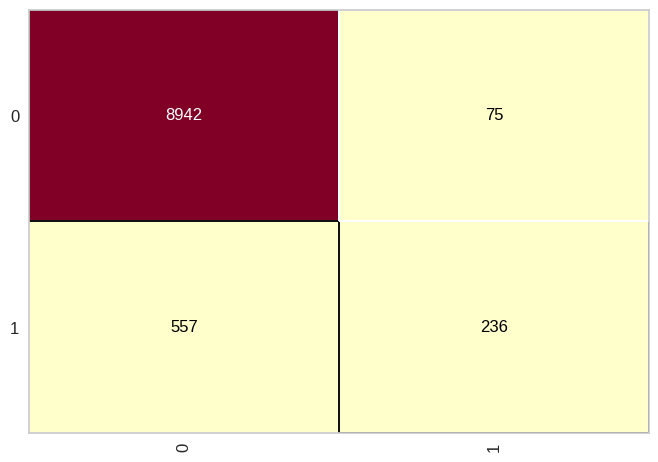

In [ ]:
cm = ConfusionMatrix(RF)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9017
           1       0.76      0.30      0.43       793

    accuracy                           0.94      9810
   macro avg       0.85      0.64      0.70      9810
weighted avg       0.93      0.94      0.92      9810



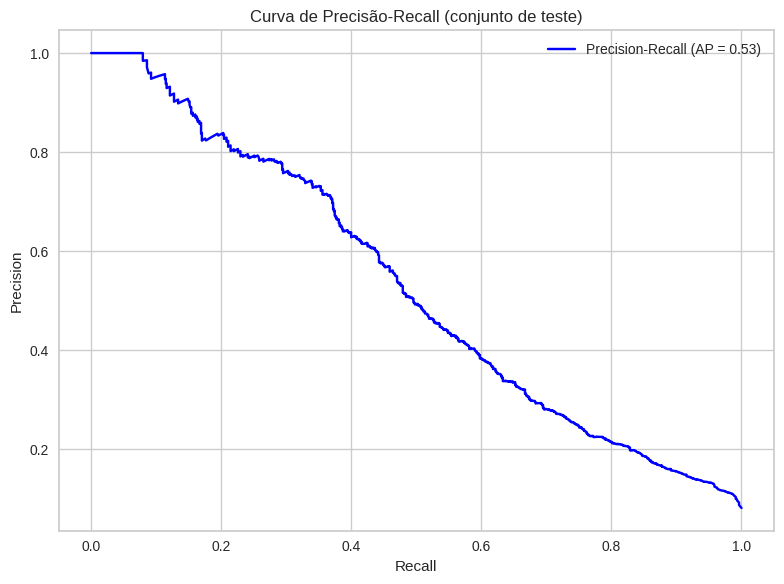

In [ ]:
y_scores = RF.predict_proba(x_teste)[:, 1]

precision, recall, _ = precision_recall_curve(y_teste, y_scores)
ap = average_precision_score(y_teste, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {ap:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisão-Recall (conjunto de teste)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

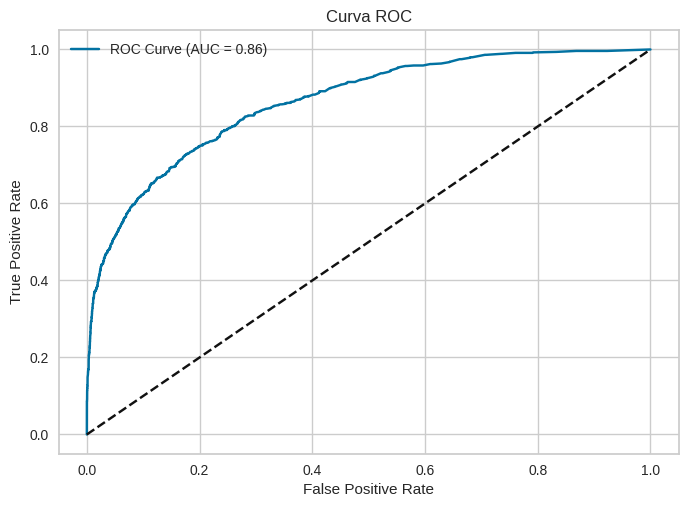

In [ ]:
fpr, tpr, _ = roc_curve(y_teste, y_scores)
roc_auc = roc_auc_score(y_teste, y_scores)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
coeficiente_gini = (2 * roc_auc) - 1

print("-" * 30)
print(f"AUC (Área Sob a Curva): {roc_auc:.4f}")
print(f"Coeficiente de Gini:    {coeficiente_gini:.4f}")
print("-" * 30)

------------------------------
AUC (Área Sob a Curva): 0.8637
Coeficiente de Gini:    0.7275
------------------------------


LGBM

In [ ]:
LGBM.fit(x_treinamento, y_treinamento)

LGBMClassifier(learning_rate=0.04953058263349447, max_depth=20,
               n_estimators=812, num_leaves=136,
               reg_lambda=0.0014394013003665076)

In [ ]:
previsoes = LGBM.predict(x_teste)
accuracy_score(y_teste, previsoes)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



0.9356778797145769

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



0.9356778797145769

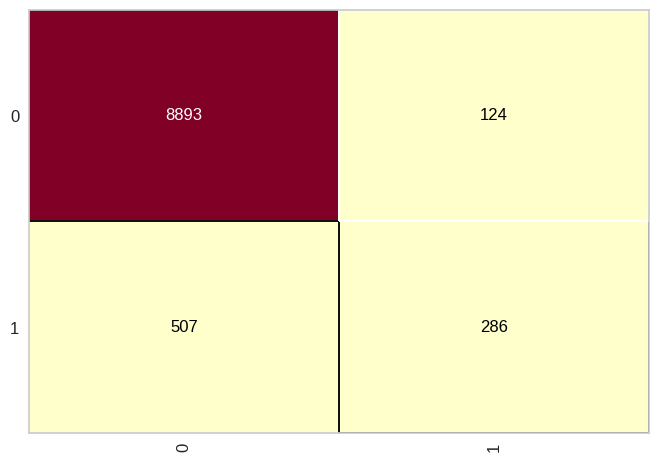

In [ ]:
cm = ConfusionMatrix(LGBM)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9017
           1       0.70      0.36      0.48       793

    accuracy                           0.94      9810
   macro avg       0.82      0.67      0.72      9810
weighted avg       0.93      0.94      0.93      9810



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



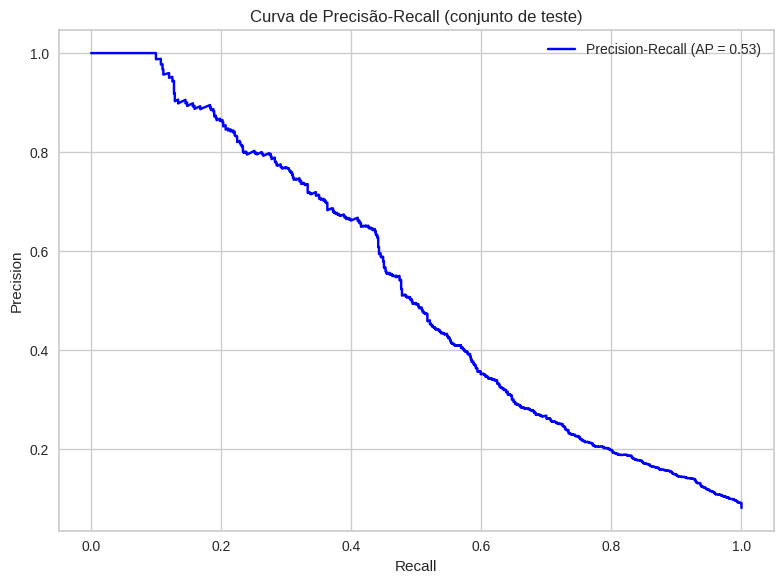

In [ ]:
y_scores = LGBM.predict_proba(x_teste)[:, 1]

precision, recall, _ = precision_recall_curve(y_teste, y_scores)
ap = average_precision_score(y_teste, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {ap:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisão-Recall (conjunto de teste)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

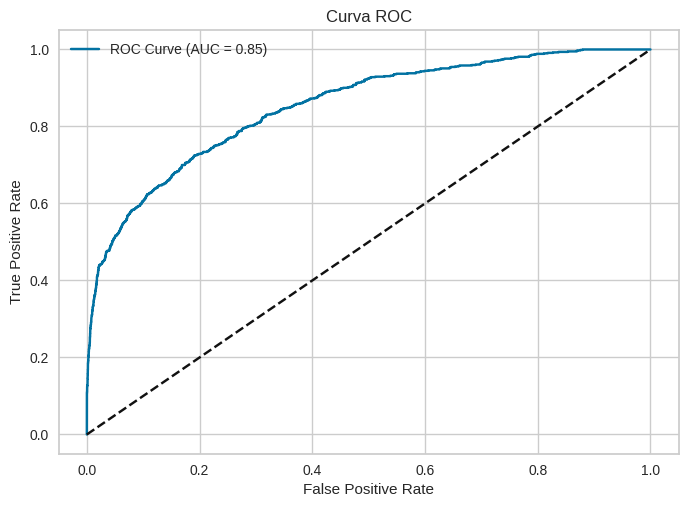

In [ ]:
fpr, tpr, _ = roc_curve(y_teste, y_scores)
roc_auc = roc_auc_score(y_teste, y_scores)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
coeficiente_gini = (2 * roc_auc) - 1

print("-" * 30)
print(f"AUC (Área Sob a Curva): {roc_auc:.4f}")
print(f"Coeficiente de Gini:    {coeficiente_gini:.4f}")
print("-" * 30)

------------------------------
AUC (Área Sob a Curva): 0.8523
Coeficiente de Gini:    0.7046
------------------------------


# Colocando nossos modelos em prática na base de TESTE FINAL

RF

In [ ]:
RF.fit(x_res_train, y_res_train)

RandomForestClassifier(class_weight='balanced', n_estimators=700,
                       random_state=42)

In [ ]:
previsoes = RF.predict(x_teste_final)
accuracy_score(y_teste_final, previsoes)

0.9098023064250412

0.9098023064250412

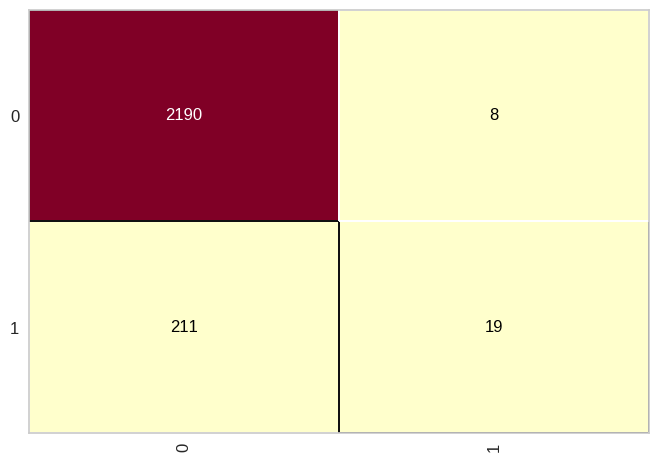

In [ ]:
cm = ConfusionMatrix(RF)
cm.fit(x_res_train, y_res_train)
cm.score(x_teste_final, y_teste_final)

In [ ]:
print(classification_report(y_teste_final, previsoes))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      2198
           1       0.70      0.08      0.15       230

    accuracy                           0.91      2428
   macro avg       0.81      0.54      0.55      2428
weighted avg       0.89      0.91      0.88      2428



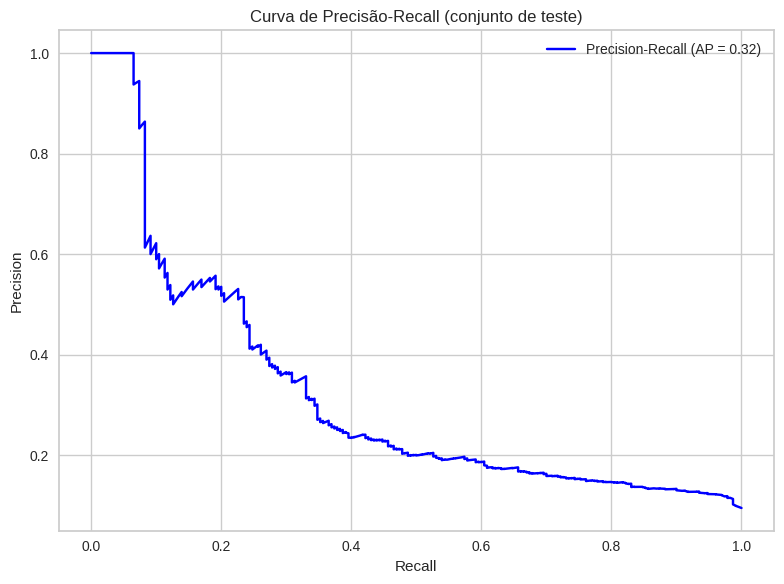

In [ ]:
y_scores = RF.predict_proba(x_teste_final)[:, 1]

precision, recall, _ = precision_recall_curve(y_teste_final, y_scores)
ap = average_precision_score(y_teste_final, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {ap:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisão-Recall (conjunto de teste)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

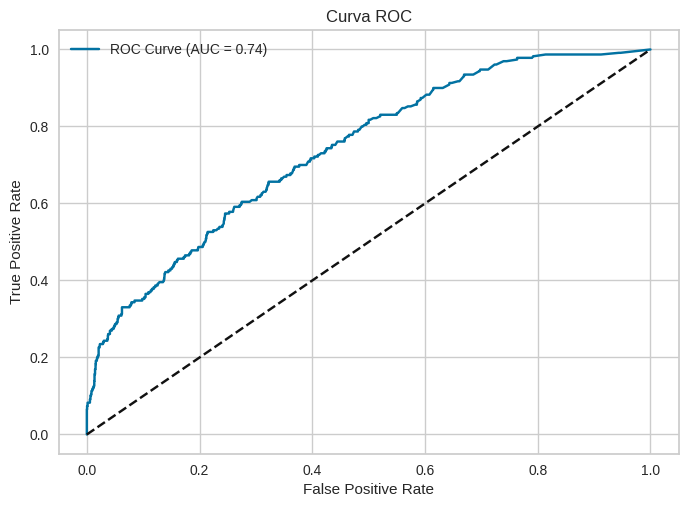

In [ ]:
fpr, tpr, _ = roc_curve(y_teste_final, y_scores)
roc_auc = roc_auc_score(y_teste_final, y_scores)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
coeficiente_gini = (2 * roc_auc) - 1

print("-" * 30)
print(f"AUC (Área Sob a Curva): {roc_auc:.4f}")
print(f"Coeficiente de Gini:    {coeficiente_gini:.4f}")
print("-" * 30)

------------------------------
AUC (Área Sob a Curva): 0.7388
Coeficiente de Gini:    0.4776
------------------------------


LGBM

In [ ]:
LGBM.fit(x_res_train, y_res_train)

LGBMClassifier(learning_rate=0.04953058263349447, max_depth=20,
               n_estimators=812, num_leaves=136,
               reg_lambda=0.0014394013003665076)

In [ ]:
previsoes = LGBM.predict(x_teste_final)
accuracy_score(y_teste_final, previsoes)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



0.9122734761120264

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



0.9122734761120264

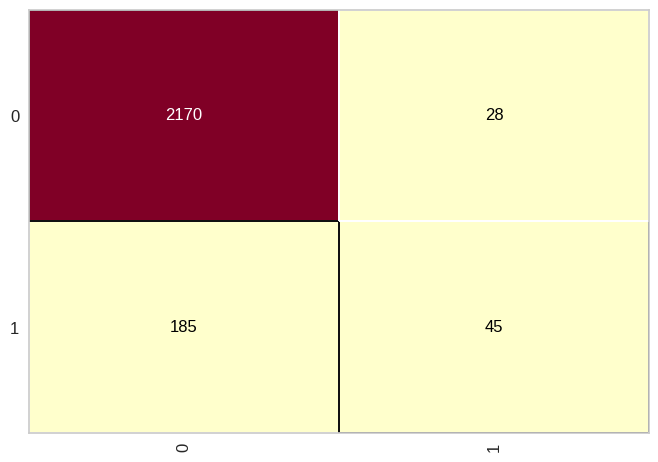

In [ ]:
cm = ConfusionMatrix(LGBM)
cm.fit(x_res_train, y_res_train)
cm.score(x_teste_final, y_teste_final)

In [ ]:
print(classification_report(y_teste_final, previsoes))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2198
           1       0.62      0.20      0.30       230

    accuracy                           0.91      2428
   macro avg       0.77      0.59      0.63      2428
weighted avg       0.89      0.91      0.89      2428



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LGBMClassifier was fitted with feature names



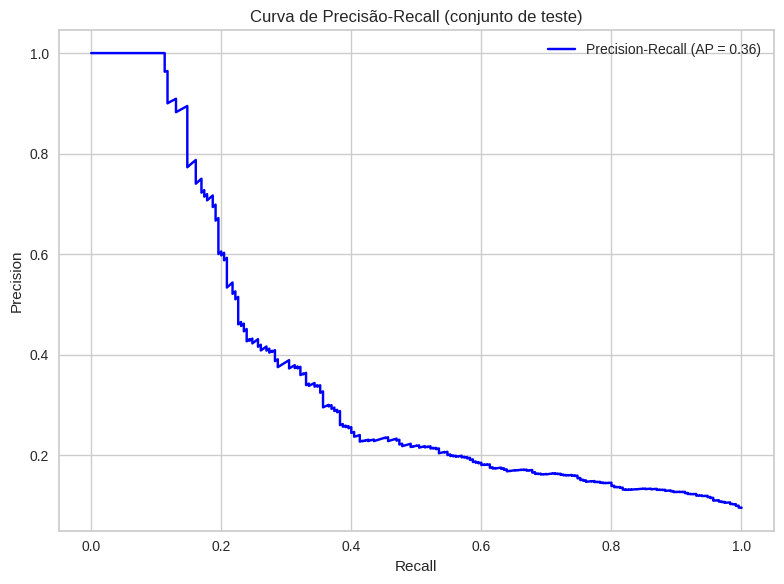

In [ ]:
y_scores = LGBM.predict_proba(x_teste_final)[:, 1]

precision, recall, _ = precision_recall_curve(y_teste_final, y_scores)
ap = average_precision_score(y_teste_final, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall (AP = {ap:.2f})', color='blue')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva de Precisão-Recall (conjunto de teste)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

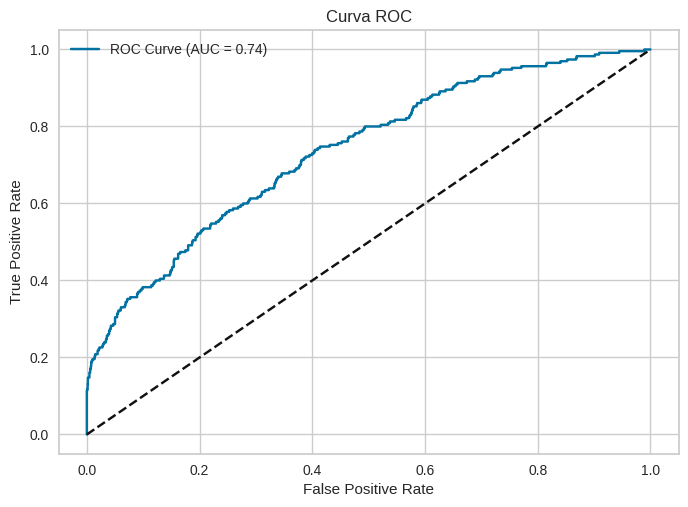

In [ ]:
fpr, tpr, _ = roc_curve(y_teste_final, y_scores)
roc_auc = roc_auc_score(y_teste_final, y_scores)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
coeficiente_gini = (2 * roc_auc) - 1

print("-" * 30)
print(f"AUC (Área Sob a Curva): {roc_auc:.4f}")
print(f"Coeficiente de Gini:    {coeficiente_gini:.4f}")
print("-" * 30)

------------------------------
AUC (Área Sob a Curva): 0.7364
Coeficiente de Gini:    0.4729
------------------------------


# Métodos de Avaliação de Modelos:

* **Recall**
  Responde: De todos os casos Positivos reais, quantos o modelo conseguiu capturar?

* **AUC (Área Sob a Curva ROC)**
   É a probabilidade de que o modelo classifique um par aleatório.

* **Coeficiente de Gini**
  O Coeficiente de Gini de um modelo  mede a capacidade do modelo de distinguir entre clientes positivos e negativos em relação a um modelo aleatório.

#Conclusão e Recomendações Estratégicas
A análise de crédito revelou segmentos de alto risco que exigem atenção imediata e um redirecionamento estratégico da oferta de crédito.

**Segmentação de Risco e Restrição de Crédito:**

Com base nos dados históricos de inadimplência, identifiquei claramente três públicos que devem ter a concessão de crédito mais restringida. Essa restrição é necessária devido às suas taxas de inadimplência significativamente superiores à média da base.

Os grupos de maior risco são, em ordem decrescente de taxa de inadimplência: Foragidos (19,92%), Clientes com Atraso Recente (15,53%) e, notavelmente, clientes que adquiriram o produto na Travessa do Tranco (14,15%).

Ao focar na performance do ano mais recente (2000), a urgência dessa restrição se confirma, com as taxas mantendo-se elevadas: o grupo de Atraso Recente sobe para 20,17%, seguido de perto por Foragidos (19,60%) e pela Travessa do Tranco (16,29%). É recomendado a aplicação de critérios de scoring mais rígidos para esses três perfis, reduzindo a exposição do banco a quase um quinto da inadimplência nesses segmentos.

**Ofertas Diferenciadas por Local e Produto:**

A análise de associação mostrou que o Local da Venda apresenta uma correlação muito mais forte com a inadimplência do que o Tipo de Produto. Enquanto o produto em si tem pouca interferência na capacidade de pagamento, a variação da taxa de inadimplência de acordo com o local é significativa.

Portanto, a estratégia de ofertas diferenciadas deve priorizar o Local da Venda. Áreas de alto risco, como a Travessa do Tranco, devem receber ofertas com spreads de risco mais elevados ou limites de crédito menores.

**Potencial e Limitações do Modelo de Machine Learning:**

Desenvolvi um modelo preditivo baseado em Random Forest com o objetivo de reduzir a carteira de inadimplentes. O modelo demonstrou um potencial promissor, conseguindo reduzir a taxa de inadimplência de 6,94% (na base original) para apenas 4,83% nas previsões. Isso indica que a inteligência artificial pode atuar como um filtro eficaz na triagem de novos clientes.

Apesar de ter atingido uma acurácia elevada, o modelo apresentou um Recall baixo, sugerindo que ele ainda falha em capturar uma parcela significativa dos verdadeiros inadimplentes. Para alcançar um objetivo mais satisfatório e maximizar a redução de risco, é imprescindível um estudo de balanceamento da base de dados para mitigar qualquer viés e otimizar o Recall. Com ajustes, o modelo tem o potencial de se tornar uma ferramenta robusta na gestão de risco de crédito do banco.